In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import numpy as np

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
import pandas as pd

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb05_22.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'FZ-CZ', 'CZ-PZ', 'Time', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan Time bulat antara 2288 hingga 2525
df_filtered = df[(df['Time'] % 1 == 0) & (df['Time'] >= 2288) & (df['Time'] <= 2525)]

# Tampilkan hasil
print(df_filtered)

# Simpan ke file Excel
df_filtered.to_excel('chb05_22 label filtering output.xlsx', index=False)

         FP1-F7     P3-O1     P4-O2    FP2-F8     FZ-CZ     CZ-PZ    Time  \
0     -0.000035 -0.000015 -0.000072 -0.000030 -0.000005 -0.000083  2288.0   
256    0.000009  0.000034  0.000100  0.000167 -0.000021  0.000061  2289.0   
512    0.000095 -0.000019 -0.000132  0.000037  0.000031  0.000037  2290.0   
768   -0.000031  0.000189  0.000049  0.000074  0.000106 -0.000017  2291.0   
1024   0.000006 -0.000047  0.000099 -0.000004  0.000038  0.000026  2292.0   
...         ...       ...       ...       ...       ...       ...     ...   
59392  0.000194  0.000031  0.000073 -0.000210 -0.000121 -0.000023  2520.0   
59648  0.000192 -0.000006  0.000023 -0.000086  0.000066 -0.000049  2521.0   
59904  0.000228 -0.000015  0.000018 -0.000026  0.000124  0.000051  2522.0   
60160 -0.000005 -0.000026  0.000003  0.000157 -0.000053 -0.000030  2523.0   
60416  0.000065 -0.000008  0.000088  0.000040  0.000181  0.000013  2524.0   

            seizure  
0      tidak kejang  
256    tidak kejang  
512    ti

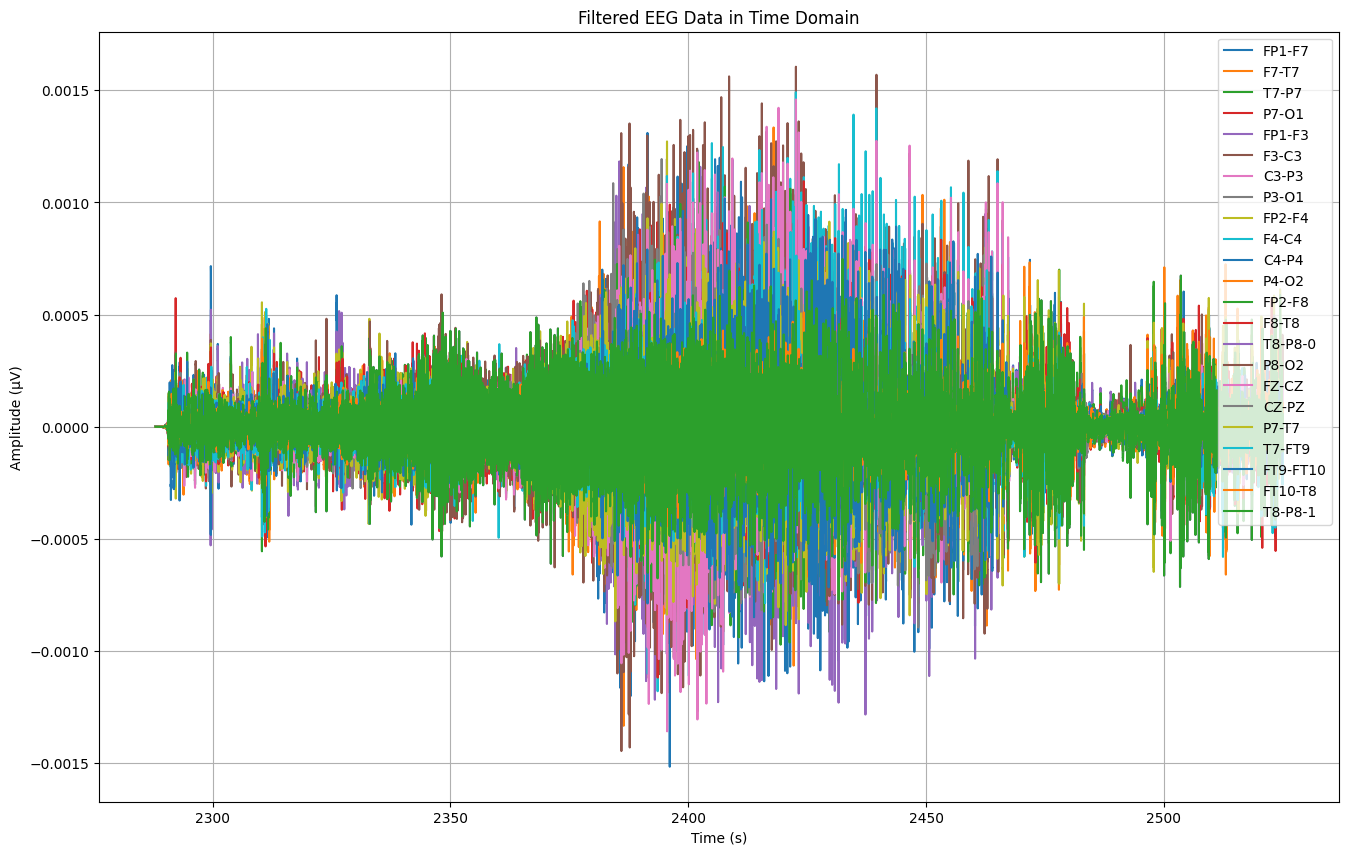

Data setelah filtering berhasil disimpan dalam file CSV:              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0      2.169737e-25  8.102803e-25 -2.831690e-25 -4.351732e-25  6.901479e-25   
1     -5.447335e-14 -2.034287e-13  7.109234e-14  1.092545e-13 -1.732683e-13   
2     -1.586527e-13 -1.032422e-12  4.417867e-13  4.534488e-13 -7.473534e-13   
3     -1.273147e-13 -1.848453e-12  9.510200e-13  6.924859e-13 -1.113906e-12   
4     -3.336354e-13 -1.661403e-12  7.668533e-13  9.431997e-13 -1.159393e-12   
...             ...           ...           ...           ...           ...   
60667 -1.831940e-05  3.224115e-04  6.129684e-06 -2.072900e-04 -1.466832e-04   
60668 -2.885972e-05  3.130061e-04  1.993347e-05 -2.107297e-04 -1.526678e-04   
60669 -4.166807e-05  3.058373e-04  2.844152e-05 -2.101636e-04 -1.554758e-04   
60670 -5.175961e-05  2.938736e-04  2.702049e-05 -2.031627e-04 -1.574069e-04   
60671 -5.537867e-05  2.708454e-04  1.763851e-05 -1.896954e-04 -1.602789e-0

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import numpy as np

# Import data yang sudah dikasih label
df_25 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='blackman')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 1409

# Misalnya, df_25 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_25.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_25[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA25 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA25['Time'] = df_25['Time'].values
TA25['seizure'] = df_25['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA25.columns:
        plt.plot(TA25['Time'], TA25[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA25.to_csv("/content/drive/MyDrive/TA/chb05_22 BLACKMAN.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA25}")


In [ ]:
import pandas as pd

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/chb05_22 BLACKMAN.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'FZ-CZ', 'CZ-PZ', 'Time', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan Time bulat antara 2288 hingga 2525
df_filtered = df[(df['Time'] % 1 == 0) & (df['Time'] >= 2288) & (df['Time'] <= 2525)]

# Tampilkan hasil
print(df_filtered)

# Simpan ke file Excel
df_filtered.to_excel('chb05_22 blackman filtering output.xlsx', index=False)

             FP1-F7         P3-O1         P4-O2        FP2-F8         FZ-CZ  \
0      2.169737e-25  9.193800e-26  4.498833e-25  1.900052e-25  3.309768e-26   
256   -9.264482e-08  9.461875e-08  3.591784e-08 -2.157094e-08  1.908440e-07   
512   -6.824251e-07  1.404409e-06  4.372456e-07  5.673071e-07  2.801213e-06   
768   -6.698285e-05 -8.919787e-06 -9.561954e-05  1.107788e-05 -6.654889e-05   
1024   7.509923e-05 -4.708472e-05 -1.535884e-04 -1.465928e-06  5.066139e-05   
...             ...           ...           ...           ...           ...   
59392 -1.627506e-05 -1.193274e-04 -1.248671e-04  5.003026e-05 -2.882997e-05   
59648 -3.629188e-05  1.115917e-05 -6.814318e-05  2.815808e-05  1.455907e-05   
59904  1.032386e-05 -2.619779e-05 -5.197421e-05 -7.085031e-06 -3.752950e-05   
60160 -1.250829e-04 -2.498171e-05  8.276805e-05 -9.663771e-07 -2.372842e-05   
60416 -2.058710e-04  8.163977e-05  1.020873e-04  9.721804e-05 -9.621394e-06   

              CZ-PZ    Time       seizure  
0      

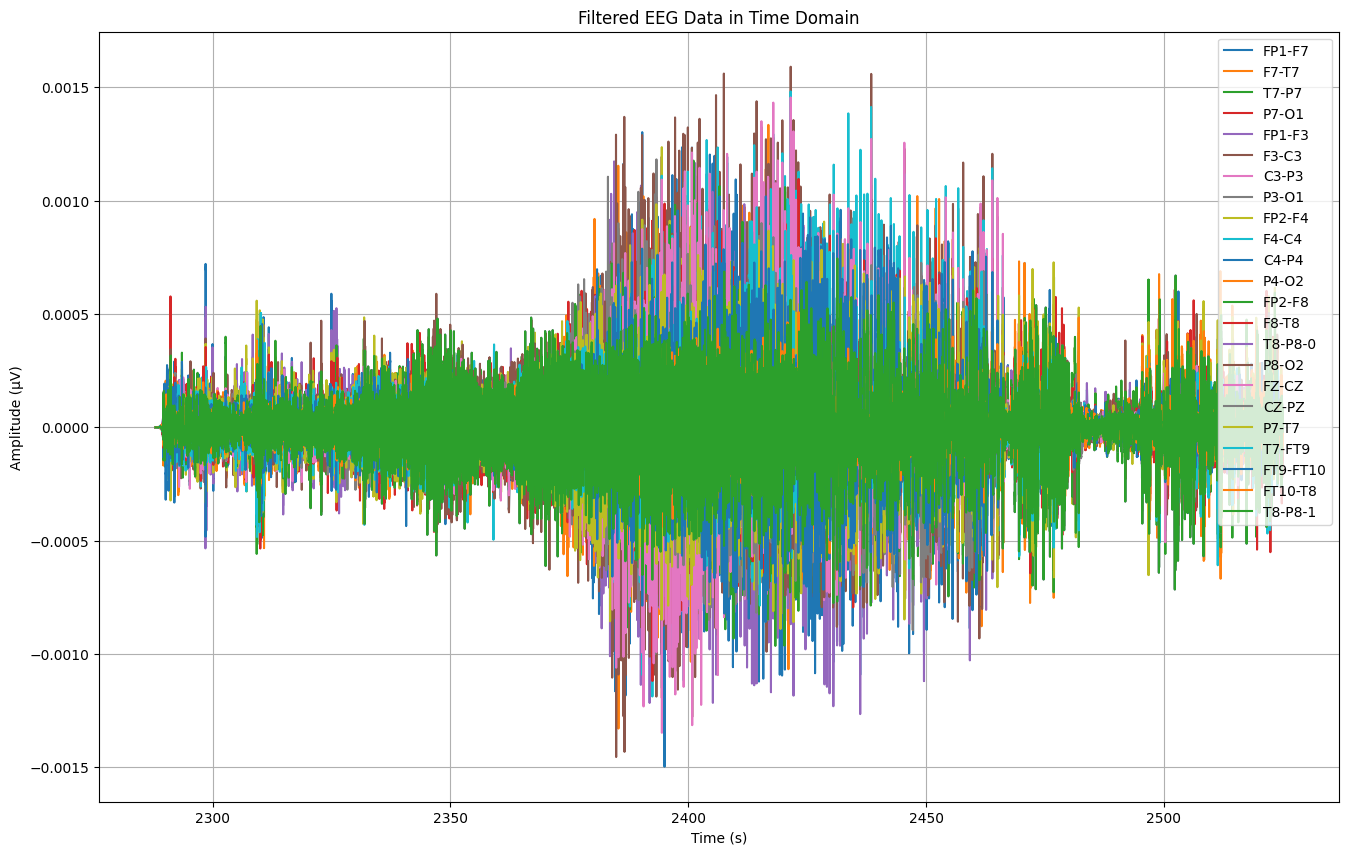

Data setelah filtering berhasil disimpan dalam file CSV:              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0     -1.433652e-09 -5.353921e-09  1.871038e-09  2.875404e-09 -4.560148e-09   
1     -2.872255e-09 -2.230482e-08  9.926296e-09  9.320225e-09 -1.552385e-08   
2     -3.878949e-09 -4.009579e-08  2.010295e-08  1.604889e-08 -2.518970e-08   
3     -7.269581e-09 -4.015465e-08  1.806492e-08  2.206982e-08 -2.801123e-08   
4     -1.168105e-08 -2.546663e-08  1.273858e-09  2.827673e-08 -2.789695e-08   
...             ...           ...           ...           ...           ...   
60667 -7.624590e-05 -6.577187e-05  2.602754e-05 -8.711372e-05 -3.018665e-05   
60668 -7.553993e-05 -6.785456e-05  3.152169e-05 -8.780374e-05 -3.065514e-05   
60669 -7.433762e-05 -6.654172e-05  2.748293e-05 -8.589394e-05 -3.225810e-05   
60670 -7.207290e-05 -5.884119e-05  1.467955e-05 -8.385038e-05 -3.377807e-05   
60671 -6.880138e-05 -4.776312e-05  1.169923e-06 -8.371425e-05 -3.400788e-0

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/chb05_22 HAMMING.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



In [ ]:
import pandas as pd

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/chb05_22 HAMMING.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'FZ-CZ', 'CZ-PZ', 'Time', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan Time bulat antara 2288 hingga 2525
df_filtered = df[(df['Time'] % 1 == 0) & (df['Time'] >= 2288) & (df['Time'] <= 2525)]

# Tampilkan hasil
print(df_filtered)

# Simpan ke file Excel
df_filtered.to_excel('chb05_22 hamming filtering output.xlsx', index=False)

             FP1-F7         P3-O1         P4-O2        FP2-F8         FZ-CZ  \
0     -1.433652e-09 -6.074797e-10 -2.972601e-09 -1.255458e-09 -2.186927e-10   
256   -2.105757e-06  1.623305e-06 -9.063184e-07 -3.397063e-07  2.194616e-06   
512   -2.528193e-06  5.275964e-05 -5.621914e-05  8.981225e-06  1.939644e-05   
768    9.021317e-05  2.662534e-05 -6.187060e-05  4.836536e-05 -9.314809e-05   
1024   2.505653e-04 -9.073227e-05  1.008860e-04  6.895412e-05  1.241030e-04   
...             ...           ...           ...           ...           ...   
59392  2.933537e-05 -6.771565e-06 -4.482984e-05  9.238261e-05 -8.251910e-07   
59648  4.995550e-05  3.585979e-05  6.214629e-06  3.647958e-05 -5.097357e-05   
59904 -1.618930e-04  2.118659e-05  1.880809e-04  2.871847e-05  1.565909e-05   
60160 -1.157191e-04  5.819057e-05  7.505590e-05 -7.287454e-05  6.733495e-06   
60416 -8.700968e-05  5.272662e-05  1.191165e-04  7.339511e-05 -8.020589e-05   

              CZ-PZ    Time       seizure  
0     -

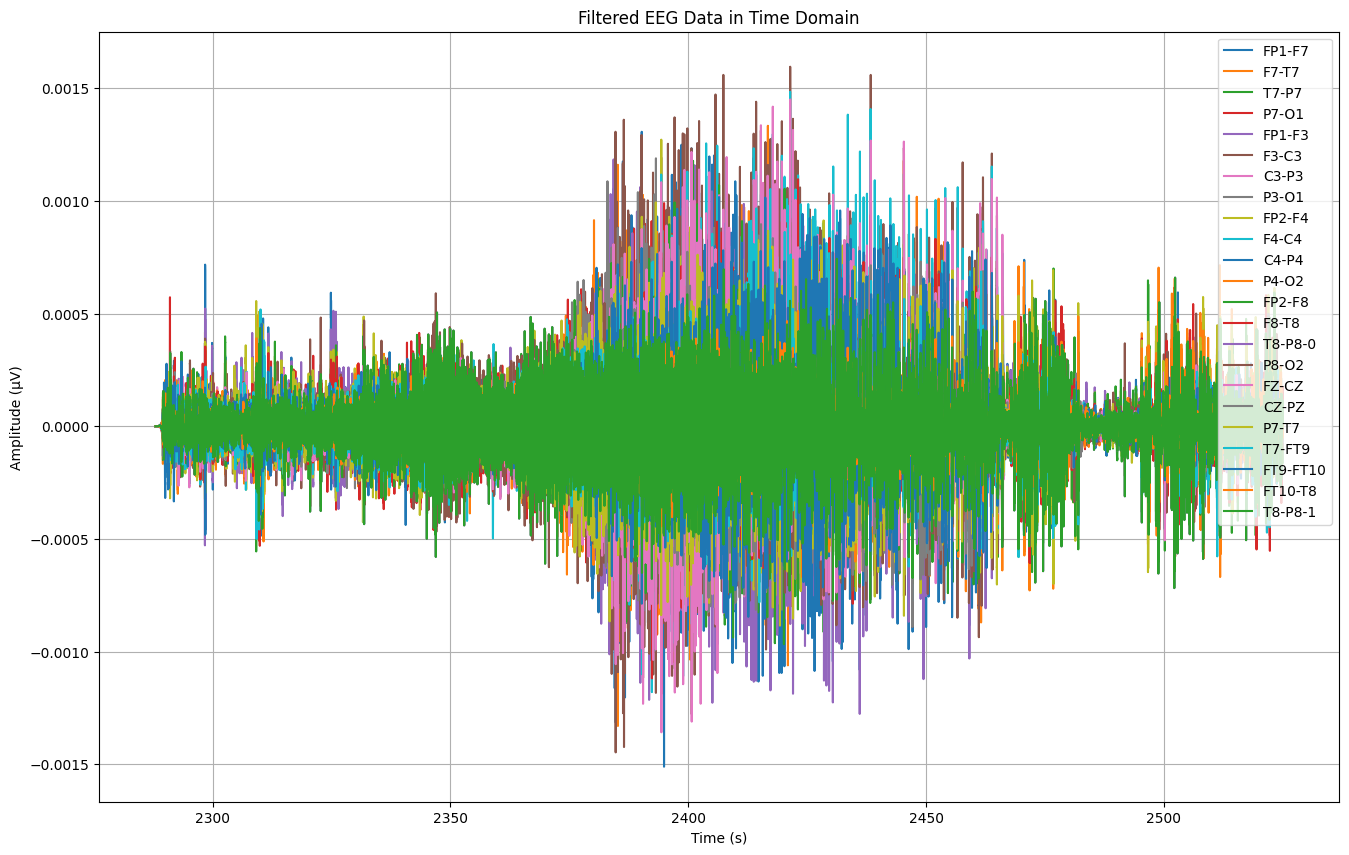

Data setelah filtering berhasil disimpan dalam file CSV:              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     -4.690951e-13 -1.751818e-12  6.122088e-13  9.408404e-13 -1.492093e-12   
2      2.978405e-13 -2.676242e-12  1.632674e-12  5.673109e-13 -1.142739e-12   
3      2.288180e-12  1.016100e-11 -3.398111e-12 -4.956475e-12  8.587645e-12   
4     -6.715424e-13  2.404968e-11 -1.394571e-11 -6.017072e-12  1.216141e-11   
...             ...           ...           ...           ...           ...   
60667  1.278623e-05  2.676661e-05 -6.268188e-06 -1.748248e-05  7.321216e-05   
60668  2.416890e-05  3.081968e-05 -5.367639e-06 -1.038471e-05  9.189524e-05   
60669  3.825952e-05  3.669224e-05 -8.813487e-06 -6.375809e-06  1.060585e-04   
60670  5.310723e-05  4.973786e-05 -1.392677e-05 -5.814151e-06  1.186596e-04   
60671  6.791638e-05  6.993670e-05 -1.705701e-05 -5.221557e-06  1.331714e-0

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hann')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 793

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/chb05_22 HANNING.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



In [ ]:
import pandas as pd

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/chb05_22 HANNING.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'FZ-CZ', 'CZ-PZ', 'Time', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan Time bulat antara 2288 hingga 2525
df_filtered = df[(df['Time'] % 1 == 0) & (df['Time'] >= 2288) & (df['Time'] <= 2525)]

# Tampilkan hasil
print(df_filtered)

# Simpan ke file Excel
df_filtered.to_excel('chb05_22 hanning filtering output.xlsx', index=False)

         FP1-F7         P3-O1     P4-O2        FP2-F8     FZ-CZ     CZ-PZ  \
0      0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000  0.000000   
256   -0.000004  1.479751e-06 -0.000003 -2.202644e-07  0.000001 -0.000002   
512    0.000114 -7.159484e-05  0.000166 -1.689864e-04 -0.000084  0.000019   
768   -0.000027  5.664348e-05  0.000098  7.957896e-05  0.000176  0.000035   
1024  -0.000106  1.833151e-04 -0.000027 -3.864980e-05 -0.000080 -0.000002   
...         ...           ...       ...           ...       ...       ...   
59392 -0.000043  8.046556e-06 -0.000038  5.949226e-05 -0.000009 -0.000038   
59648  0.000048  1.255015e-07  0.000062  6.682807e-05  0.000030  0.000029   
59904  0.000206  3.183068e-05 -0.000124 -1.558391e-04 -0.000006  0.000322   
60160  0.000025  1.900229e-05 -0.000025 -1.361864e-04  0.000025  0.000024   
60416 -0.000054 -2.228836e-05  0.000010  3.831763e-05 -0.000119  0.000048   

         Time       seizure  
0      2288.0  tidak kejang  
256    2289.0  

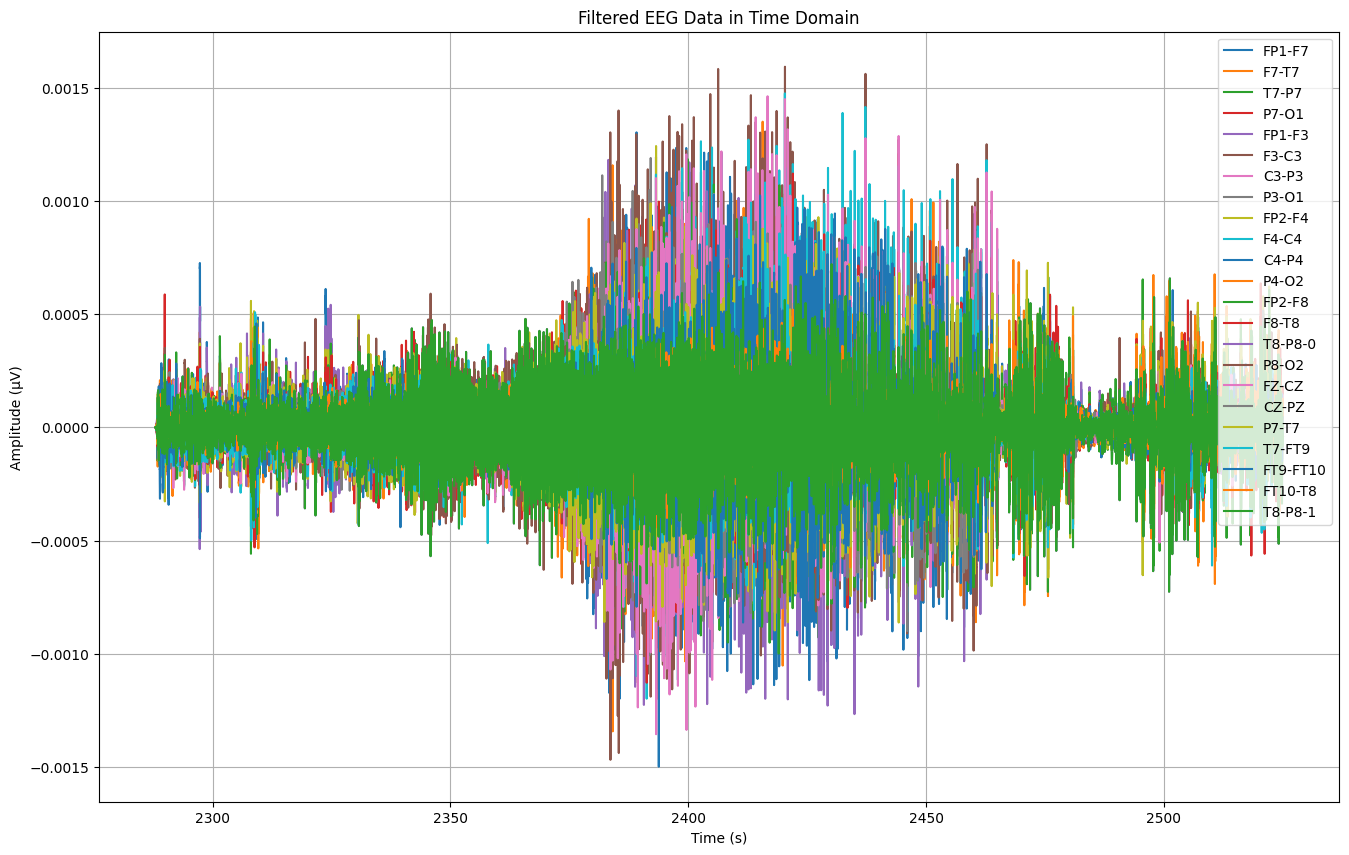

Data setelah filtering berhasil disimpan dalam file CSV:              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0     -4.182301e-08 -1.561865e-07  5.458258e-08  8.388232e-08 -1.330303e-07   
1     -3.182162e-08 -4.566087e-07  2.217497e-07  1.676617e-07 -2.875652e-07   
2      8.479111e-09 -2.957272e-07  2.037645e-07  9.519354e-08 -1.163875e-07   
3     -3.454402e-08  5.614011e-07 -3.253976e-07 -5.547480e-08  2.914452e-07   
4     -2.064799e-08  1.251666e-06 -8.831802e-07 -1.941981e-07  5.467461e-07   
...             ...           ...           ...           ...           ...   
60667  1.683711e-04  1.969149e-05 -7.713369e-07 -3.143018e-05  1.149218e-04   
60668  1.736904e-04  1.664455e-05 -1.370607e-06 -3.137857e-05  1.275324e-04   
60669  1.777435e-04  8.389572e-06  2.696610e-06 -3.173129e-05  1.383654e-04   
60670  1.797101e-04  6.235004e-08  9.138443e-06 -3.293671e-05  1.475125e-04   
60671  1.805729e-04 -4.277147e-06  1.452776e-05 -3.463853e-05  1.555869e-0

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='boxcar')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 230

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/chb05_22 RECTANGULAR.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



In [ ]:
import pandas as pd

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/chb05_22 RECTANGULAR.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'FZ-CZ', 'CZ-PZ', 'Time', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan Time bulat antara 2288 hingga 2525
df_filtered = df[(df['Time'] % 1 == 0) & (df['Time'] >= 2288) & (df['Time'] <= 2525)]

# Tampilkan hasil
print(df_filtered)

# Simpan ke file Excel
df_filtered.to_excel('chb05_22 rectangular filtering output.xlsx', index=False)

             FP1-F7         P3-O1         P4-O2        FP2-F8         FZ-CZ  \
0     -4.182301e-08 -1.772162e-08 -8.671778e-08 -3.662467e-08 -6.379782e-09   
256   -1.046707e-05 -3.672253e-05 -1.737373e-05 -3.226579e-06 -2.680711e-05   
512   -7.529118e-05  1.432102e-05  5.440697e-05 -9.587215e-05 -3.476651e-05   
768   -1.618276e-05  1.654588e-04  2.868631e-05  1.167658e-04  9.899971e-05   
1024  -1.970521e-05 -7.569143e-05 -6.680391e-05 -5.757934e-05  1.313774e-04   
...             ...           ...           ...           ...           ...   
59392  8.408009e-05 -2.020115e-05 -8.513343e-06  5.873247e-05  1.430643e-04   
59648 -9.203935e-05  7.987607e-05 -1.476700e-04 -5.169762e-05  6.103899e-05   
59904  7.589614e-05 -5.383081e-05 -6.637245e-05 -1.794296e-04  1.492002e-05   
60160 -5.577772e-05 -1.243434e-05 -3.693195e-05 -7.021520e-05 -5.276075e-05   
60416  1.617373e-04 -7.481624e-06  2.893017e-05  1.117623e-04  4.055457e-05   

              CZ-PZ    Time       seizure  
0     -

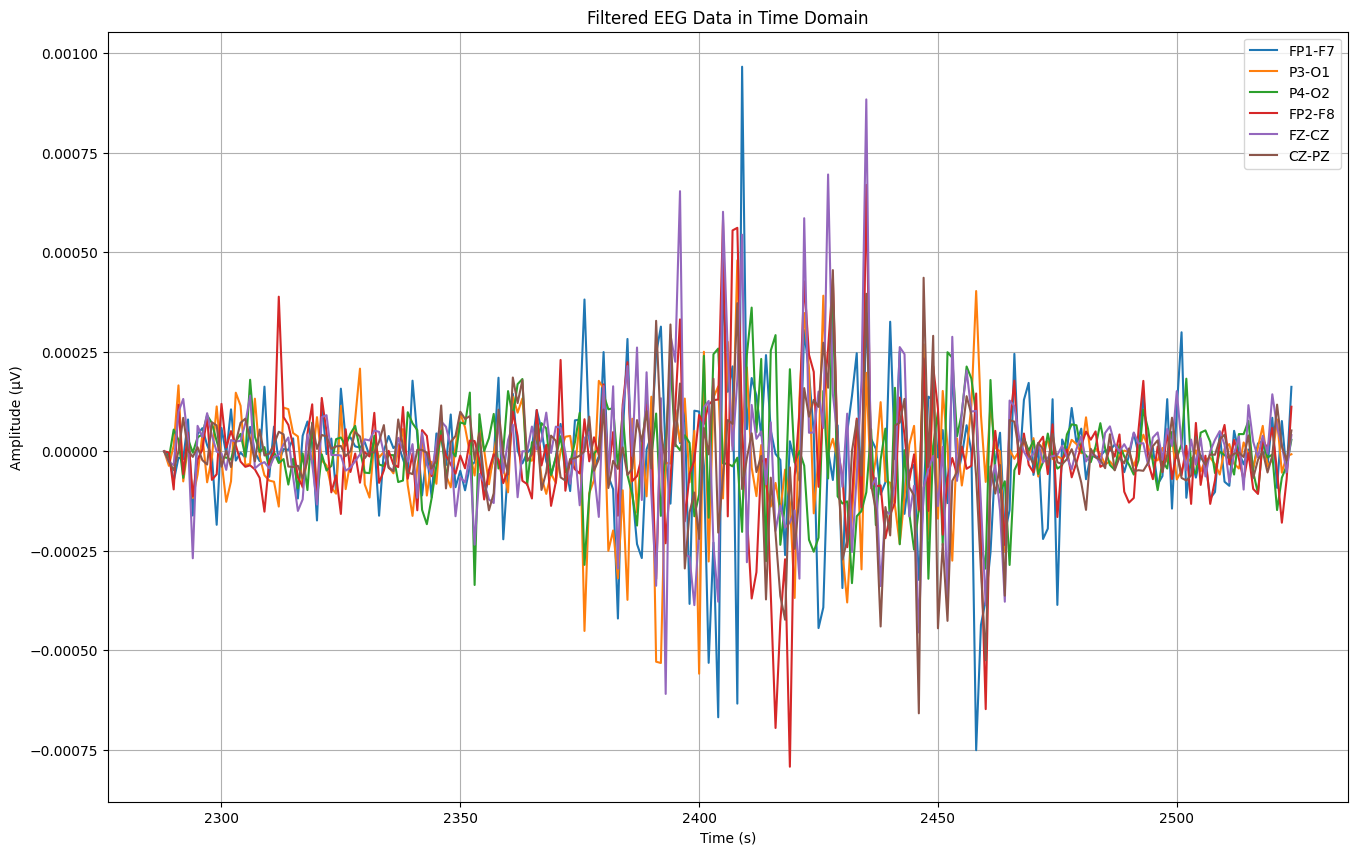

In [ ]:
TA1 = pd.read_excel("chb05_22 rectangular filtering output.xlsx")

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'F8-T8', 'FZ-CZ', 'CZ-PZ']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

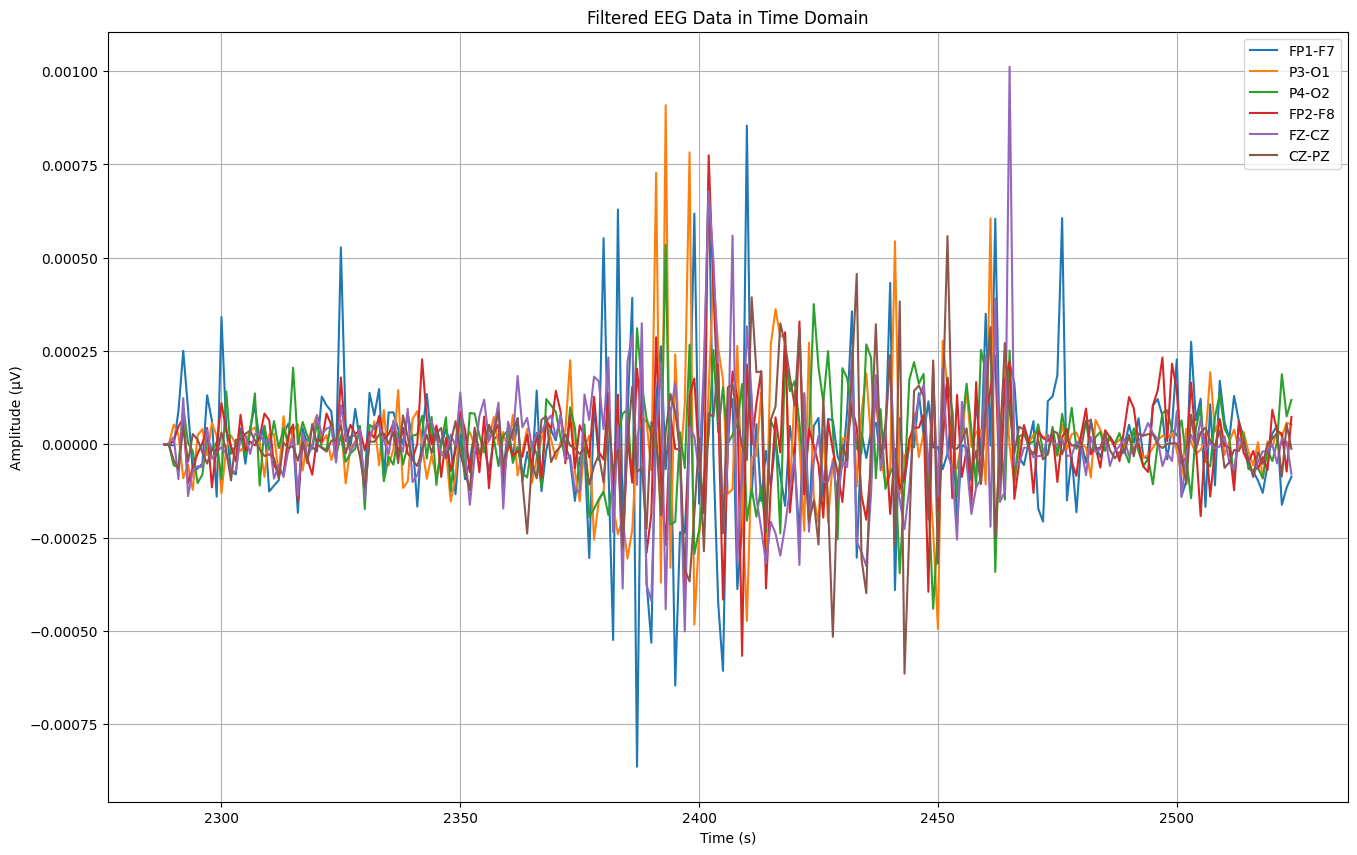

In [ ]:
TA1 = pd.read_excel("chb05_22 hamming filtering output.xlsx")

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'F8-T8', 'FZ-CZ', 'CZ-PZ']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

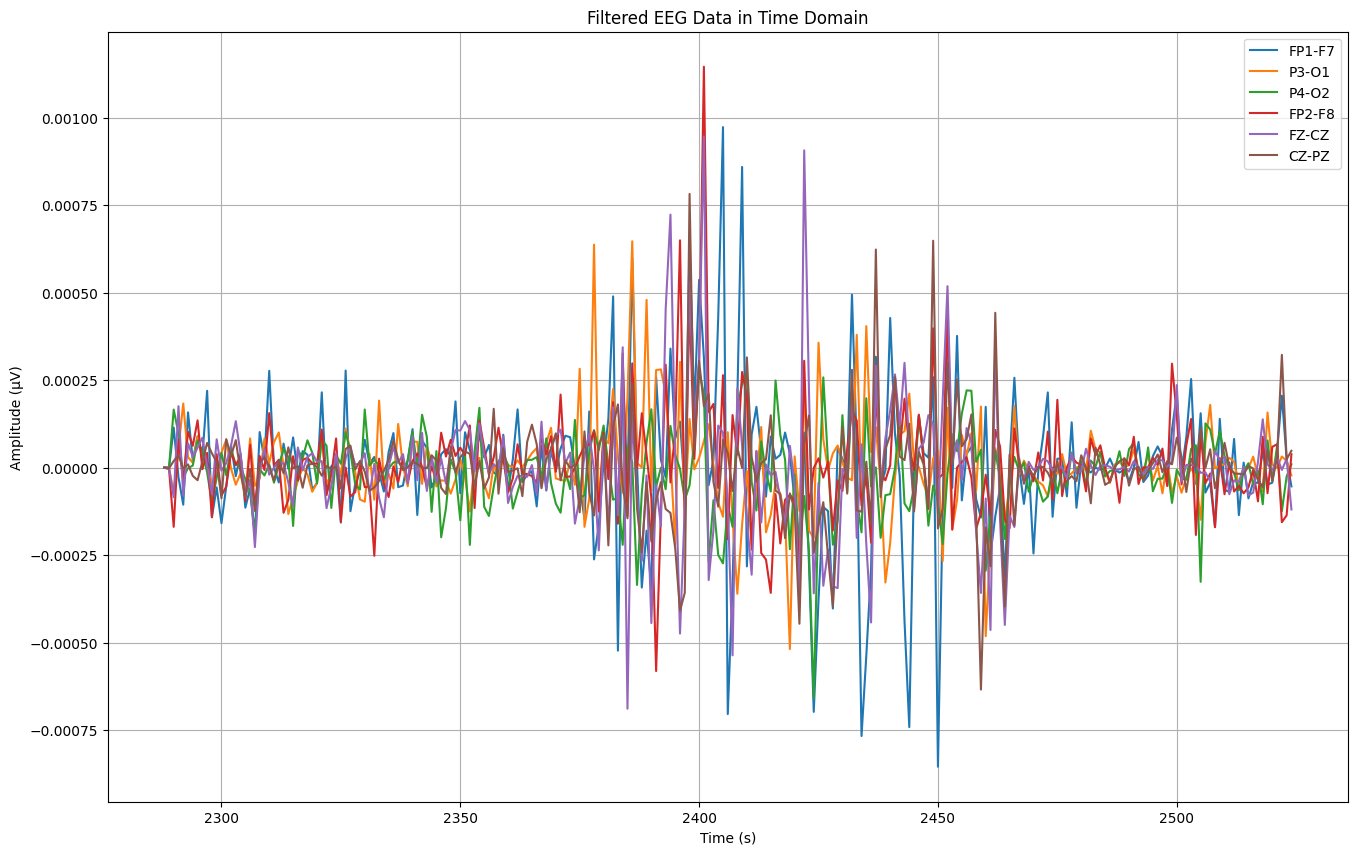

In [ ]:
TA1 = pd.read_excel("chb05_22 hanning filtering output.xlsx")

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'F8-T8', 'FZ-CZ', 'CZ-PZ']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

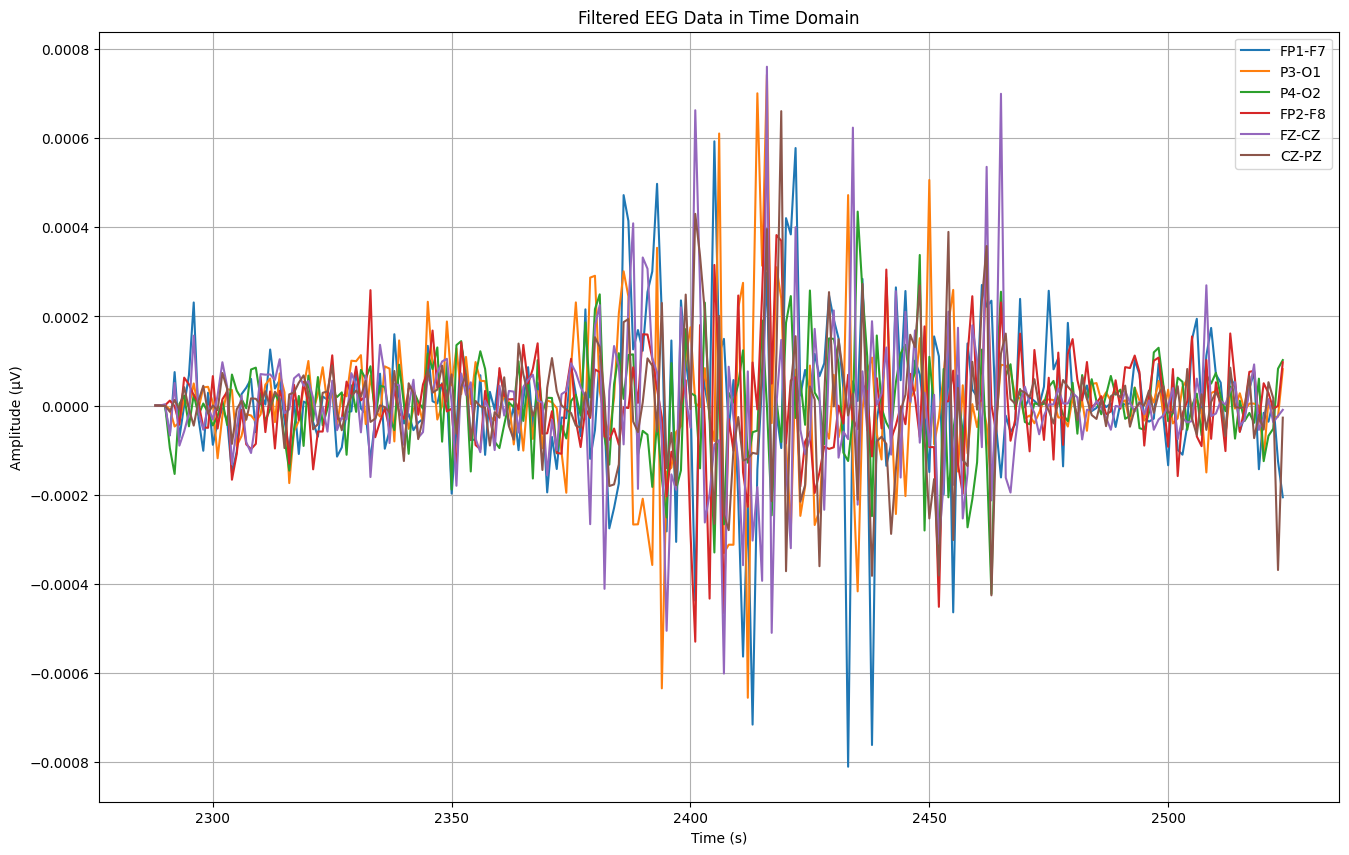

In [ ]:
TA1 = pd.read_excel("chb05_22 blackman filtering output.xlsx")

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'P3-O1', 'P4-O2', 'FP2-F8', 'F8-T8', 'FZ-CZ', 'CZ-PZ']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# BERDASARKAN WINDOW

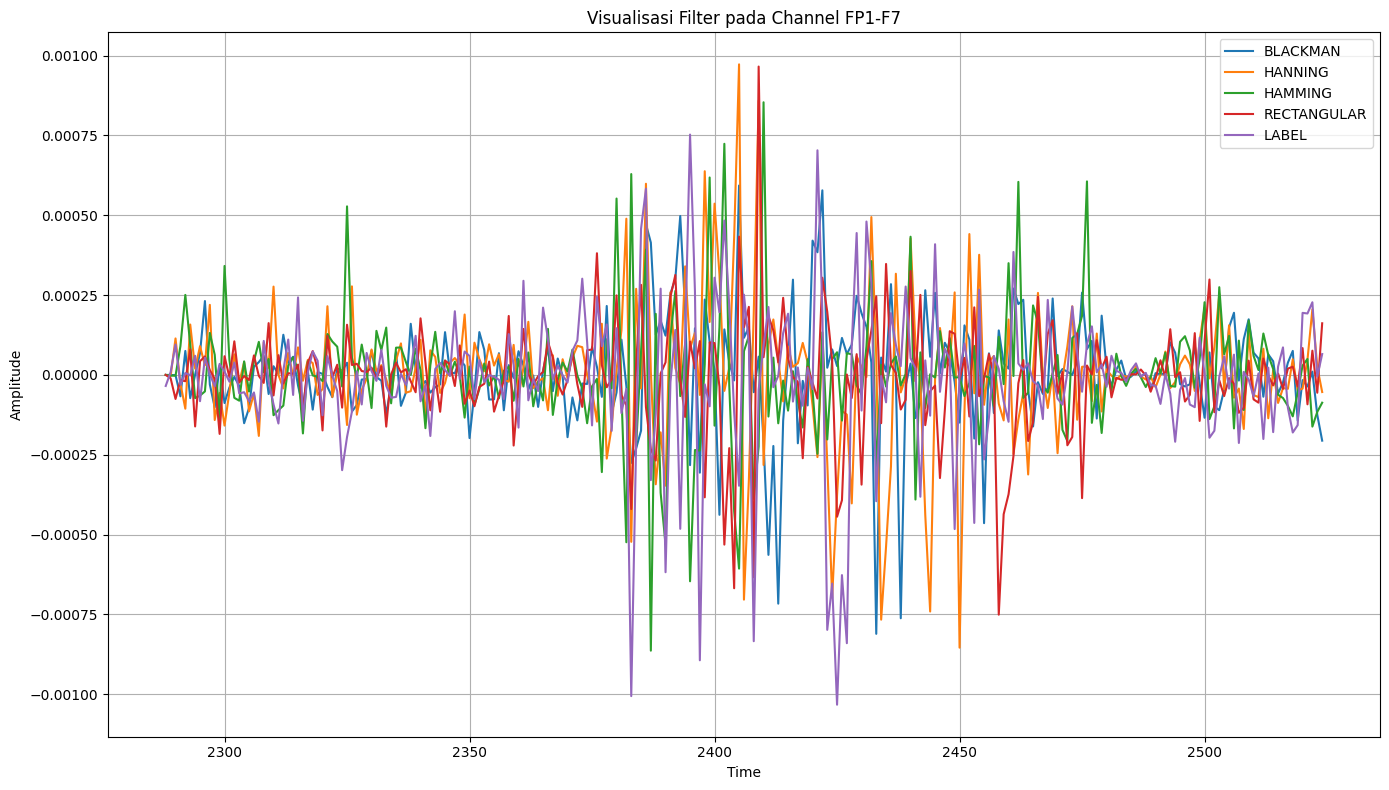

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
# Membaca file Excel
df = pd.read_excel('/content/fp1-f7 chb05_22.xlsx')
df

plt.figure(figsize=(14, 8))

plt.plot(df['Time'], df['FP1-F7 BLACKMAN'], label='BLACKMAN')
plt.plot(df['Time'], df['FP1-F7 HANNING'], label='HANNING')
plt.plot(df['Time'], df['FP1-F7 HAMMING'], label='HAMMING')
plt.plot(df['Time'], df['FP1-F7 RECTANGULAR'], label='RECTANGULAR')
plt.plot(df['Time'], df['FP1-F7 LABEL'], label='LABEL')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Visualisasi Filter pada Channel FP1-F7')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

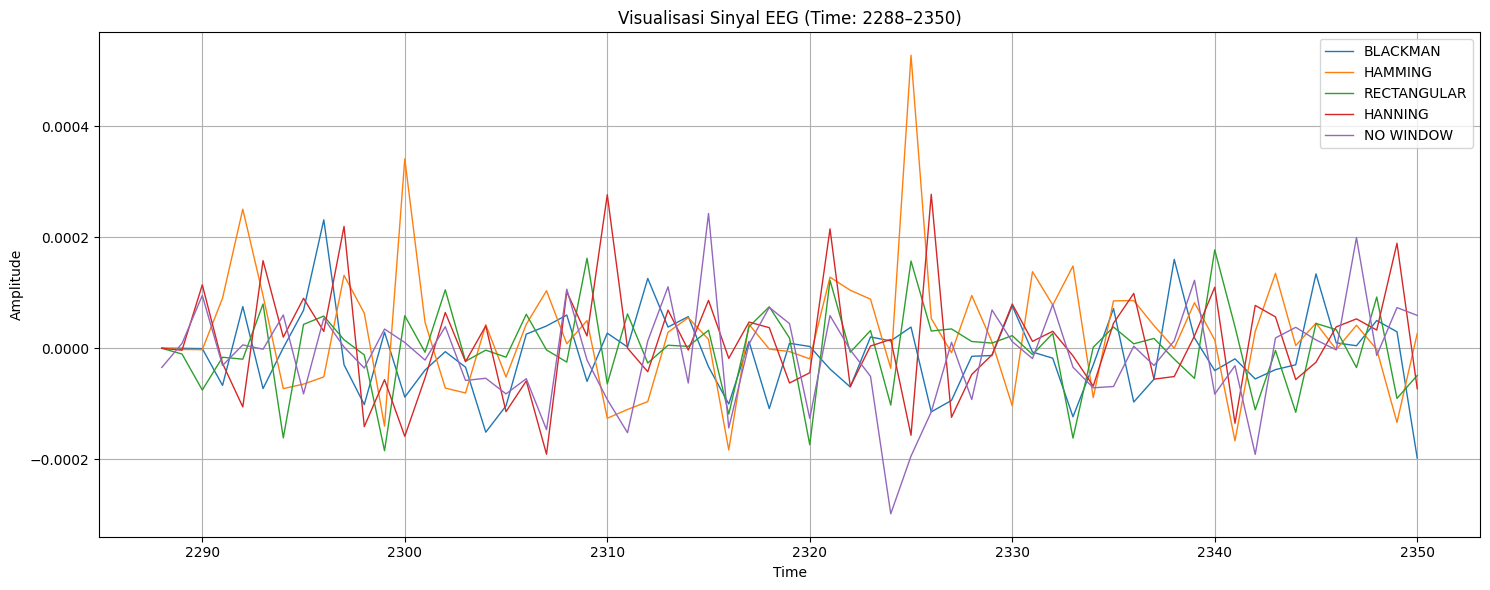

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/fp1-f7 chb05_22.xlsx')

# Pastikan kolom 'Time' bertipe numerik
df['Time'] = pd.to_numeric(df['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered = df[(df['Time'] >= 2288) & (df['Time'] <= 2350)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered['Time'], df_filtered['FP1-F7 BLACKMAN'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HAMMING'], label='HAMMING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 RECTANGULAR'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HANNING'], label='HANNING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 LABEL'], label='NO WINDOW', linewidth=1)

plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


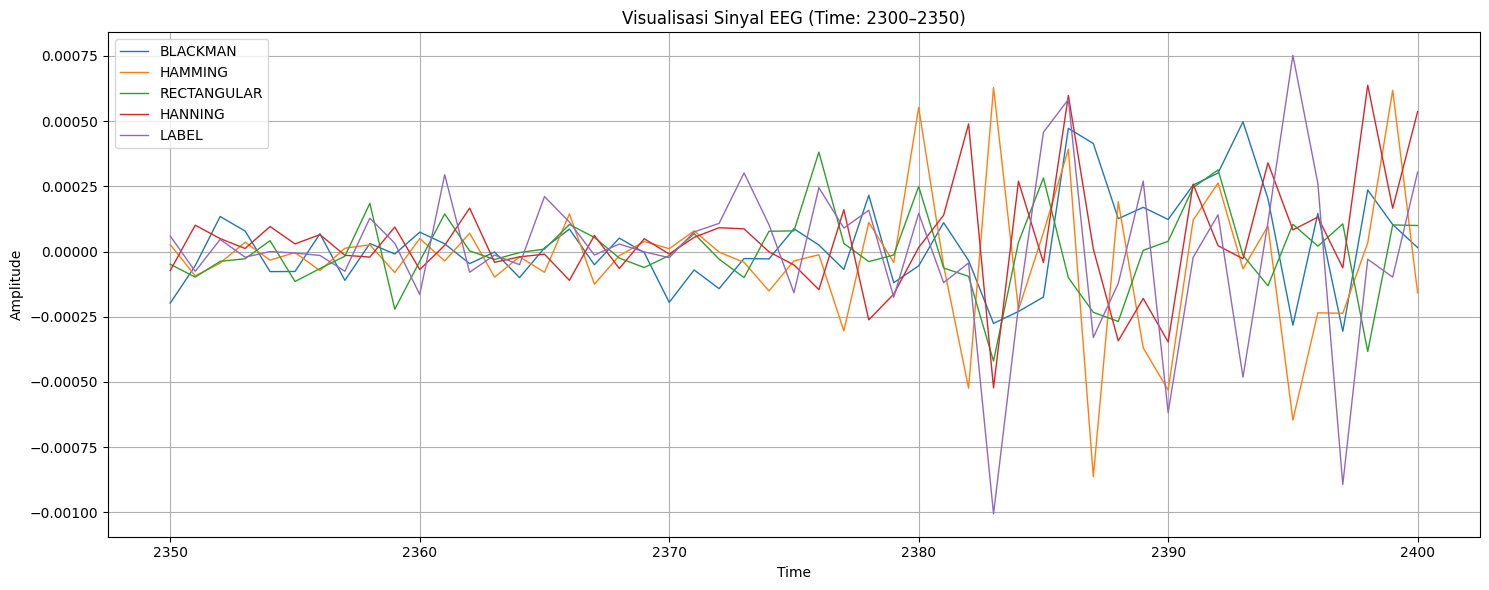

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/fp1-f7 chb05_22.xlsx')

# Pastikan kolom 'Time' bertipe numerik
df['Time'] = pd.to_numeric(df['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered = df[(df['Time'] >= 2350) & (df['Time'] <= 2400)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered['Time'], df_filtered['FP1-F7 BLACKMAN'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HAMMING'], label='HAMMING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 RECTANGULAR'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HANNING'], label='HANNING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 LABEL'], label='LABEL', linewidth=1)

plt.title('Visualisasi Sinyal EEG (Time: 2300–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


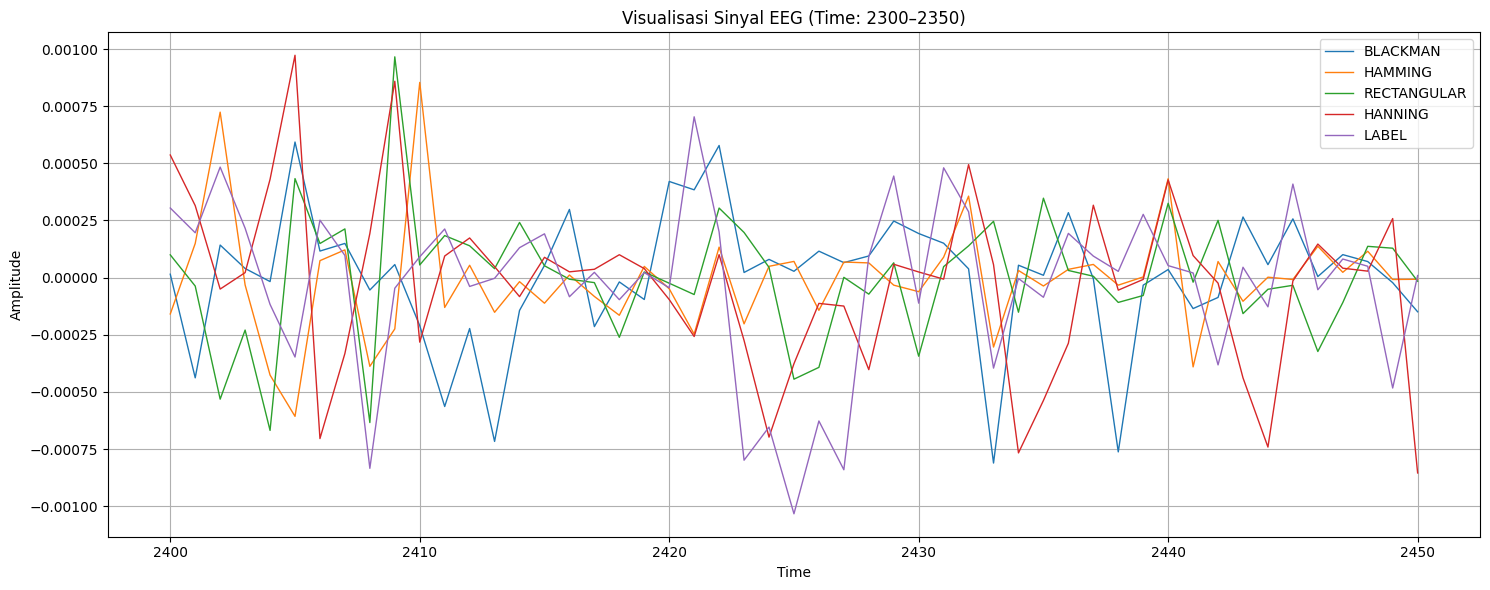

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/fp1-f7 chb05_22.xlsx')

# Pastikan kolom 'Time' bertipe numerik
df['Time'] = pd.to_numeric(df['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered = df[(df['Time'] >= 2400) & (df['Time'] <= 2450)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered['Time'], df_filtered['FP1-F7 BLACKMAN'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HAMMING'], label='HAMMING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 RECTANGULAR'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 HANNING'], label='HANNING', linewidth=1)
plt.plot(df_filtered['Time'], df_filtered['FP1-F7 LABEL'], label='LABEL', linewidth=1)

plt.title('Visualisasi Sinyal EEG (Time: 2300–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# statistik filtering

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
rectangular = pd.read_csv("/content/chb05_22 RECTANGULAR.csv")

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = rectangular.drop(columns=["Time", "seizure"]).columns
eeg_data = rectangular[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_rectangular = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_rectangular)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = rectangular["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -4.109585e-08  0.001303 -0.001499  0.000199  0.002403
F7-T7    -6.930357e-08  0.001350 -0.001343  0.000186  0.002099
T7-P7     8.460274e-09  0.000860 -0.000990  0.000157  0.001497
P7-O1    -7.769090e-09  0.001038 -0.000935  0.000144  0.001250
FP1-F3   -1.050169e-07  0.001181 -0.001267  0.000178  0.001928
F3-C3     2.451817e-08  0.001593 -0.001468  0.000232  0.003278
C3-P3    -1.347434e-08  0.000700 -0.000836  0.000130  0.001018
P3-O1    -1.564045e-08  0.001189 -0.001006  0.000146  0.001296
FP2-F4   -6.054766e-08  0.001242 -0.000897  0.000148  0.001330
F4-C4    -5.248365e-08  0.001475 -0.001198  0.000196  0.002337
C4-P4     3.380908e-10  0.000945 -0.000717  0.000147  0.001311
P4-O2     2.837900e-08  0.000743 -0.000743  0.000121  0.000883
FP2-F8   -7.025370e-08  0.001184 -0.000999  0.000151  0.001380
F8-T8    -9.238956e-09  0.001121 -0.001202  0.000161  0.001572
T8-P8-0   8.467863e-09  0.000721

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
hamming = pd.read_csv("/content/chb05_22 HAMMING.csv")

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = hamming.drop(columns=["Time", "seizure"]).columns
eeg_data = hamming[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_hamming = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_hamming)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = hamming["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -2.040064e-08  0.001302 -0.001497  0.000196  0.002337
F7-T7    -2.783341e-08  0.001334 -0.001329  0.000184  0.002053
T7-P7     2.223711e-08  0.000856 -0.000984  0.000155  0.001456
P7-O1    -1.436438e-08  0.001039 -0.000926  0.000142  0.001219
FP1-F3   -3.293012e-08  0.001173 -0.001265  0.000176  0.001872
F3-C3     2.068718e-09  0.001591 -0.001455  0.000229  0.003175
C3-P3    -5.466782e-09  0.000701 -0.000822  0.000128  0.000987
P3-O1    -4.324011e-09  0.001182 -0.001000  0.000144  0.001266
FP2-F4   -1.603765e-08  0.001236 -0.000890  0.000147  0.001311
F4-C4    -8.459580e-09  0.001482 -0.001188  0.000194  0.002289
C4-P4    -1.977660e-08  0.000960 -0.000704  0.000146  0.001296
P4-O2    -2.405210e-08  0.000728 -0.000735  0.000119  0.000860
FP2-F8   -5.512781e-10  0.001177 -0.000964  0.000148  0.001337
F8-T8    -6.296537e-08  0.001096 -0.001194  0.000159  0.001528
T8-P8-0   2.167924e-09  0.000745

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
hanning = pd.read_csv("/content/chb05_22 HANNING.csv")

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = hanning.drop(columns=["Time", "seizure"]).columns
eeg_data = hanning[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_hanning)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = hanning["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -2.903626e-08  0.001306 -0.001511  0.000196  0.002333
F7-T7    -2.997431e-08  0.001333 -0.001330  0.000184  0.002048
T7-P7     2.556298e-08  0.000866 -0.000993  0.000155  0.001454
P7-O1    -3.210751e-08  0.001039 -0.000928  0.000142  0.001218
FP1-F3   -2.380752e-08  0.001184 -0.001276  0.000176  0.001869
F3-C3    -1.260522e-08  0.001595 -0.001447  0.000229  0.003170
C3-P3    -1.767793e-08  0.000704 -0.000824  0.000127  0.000986
P3-O1    -1.102375e-08  0.001189 -0.000996  0.000144  0.001265
FP2-F4   -5.650180e-09  0.001271 -0.000885  0.000147  0.001305
F4-C4    -1.518685e-08  0.001484 -0.001180  0.000194  0.002281
C4-P4    -2.111661e-08  0.000957 -0.000706  0.000146  0.001289
P4-O2    -1.313198e-08  0.000728 -0.000734  0.000119  0.000856
FP2-F8   -5.264195e-08  0.001177 -0.000967  0.000148  0.001335
F8-T8    -4.933145e-09  0.001096 -0.001188  0.000158  0.001523
T8-P8-0   3.131174e-08  0.000743

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
blackman = pd.read_csv("/content/chb05_22 BLACKMAN (1).csv")

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = blackman.drop(columns=["Time", "seizure"]).columns
eeg_data = blackman[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_blackman = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_blackman)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = blackman["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7    5.465276e-08  0.001310 -0.001515  0.000197  0.002346
F7-T7     9.044341e-08  0.001334 -0.001333  0.000184  0.002059
T7-P7     4.069300e-08  0.000867 -0.000994  0.000155  0.001461
P7-O1    -6.234551e-08  0.001040 -0.000925  0.000142  0.001222
FP1-F3    5.066584e-08  0.001183 -0.001283  0.000176  0.001877
F3-C3     1.044918e-07  0.001605 -0.001445  0.000229  0.003183
C3-P3    -1.493240e-08  0.000706 -0.000822  0.000128  0.000990
P3-O1    -1.672398e-08  0.001193 -0.000998  0.000145  0.001269
FP2-F4   -2.032288e-08  0.001272 -0.000884  0.000147  0.001320
F4-C4     4.121389e-08  0.001491 -0.001179  0.000195  0.002301
C4-P4     1.815110e-08  0.000967 -0.000700  0.000147  0.001307
P4-O2     1.270823e-08  0.000732 -0.000736  0.000120  0.000867
FP2-F8   -1.597984e-08  0.001180 -0.000971  0.000149  0.001341
F8-T8    -2.561068e-09  0.001095 -0.001187  0.000159  0.001533
T8-P8-0   6.037556e-08  0.000749

#FFT

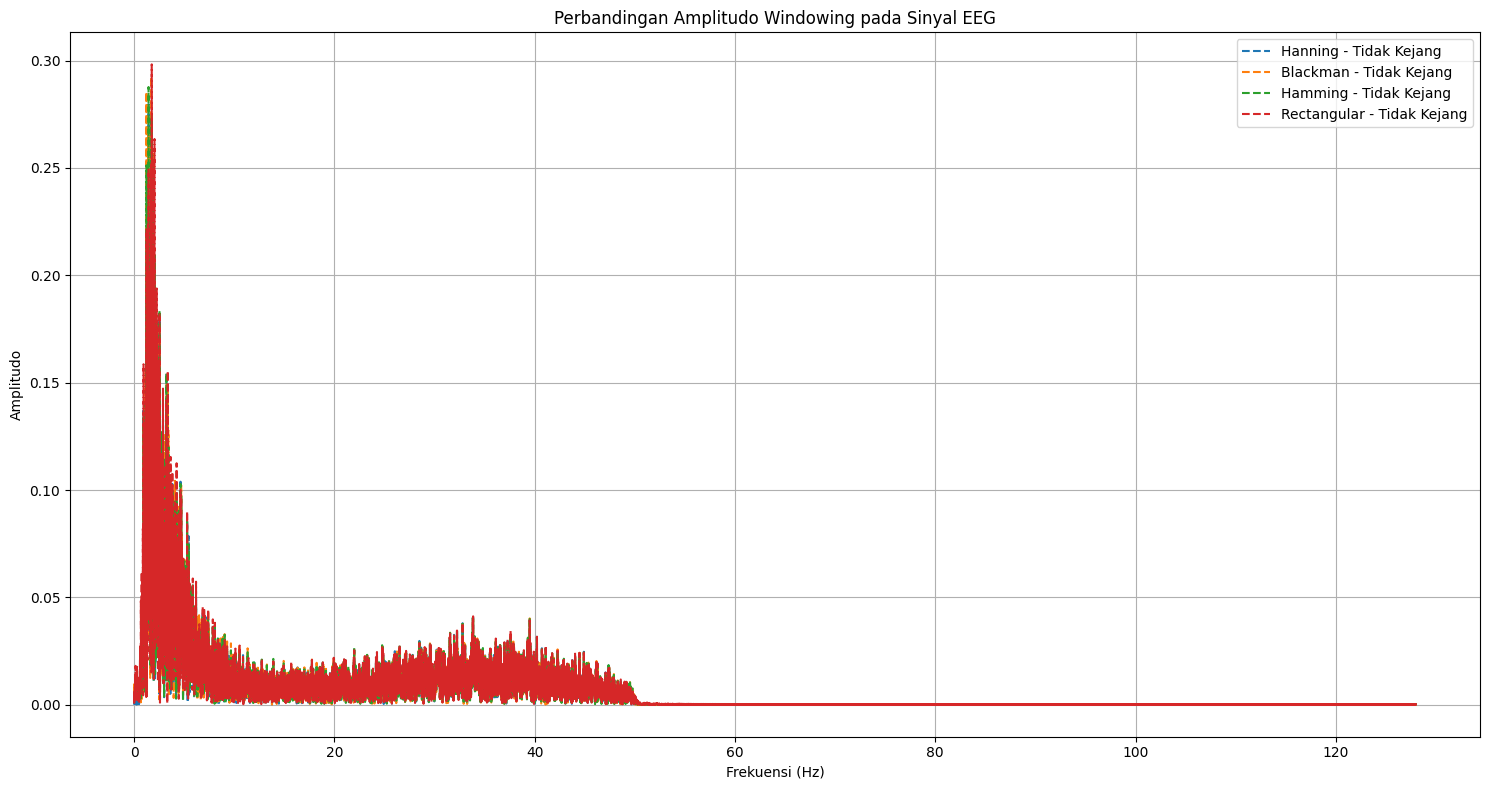

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))


# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HANNING'], label='Hanning - Tidak Kejang', linestyle='--')
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 BLACKMAN'], label='Blackman - Tidak Kejang', linestyle='--')
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HAMMING'], label='Hamming - Tidak Kejang', linestyle='--')
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Tidak Kejang', linestyle='--')

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Windowing pada Sinyal EEG')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

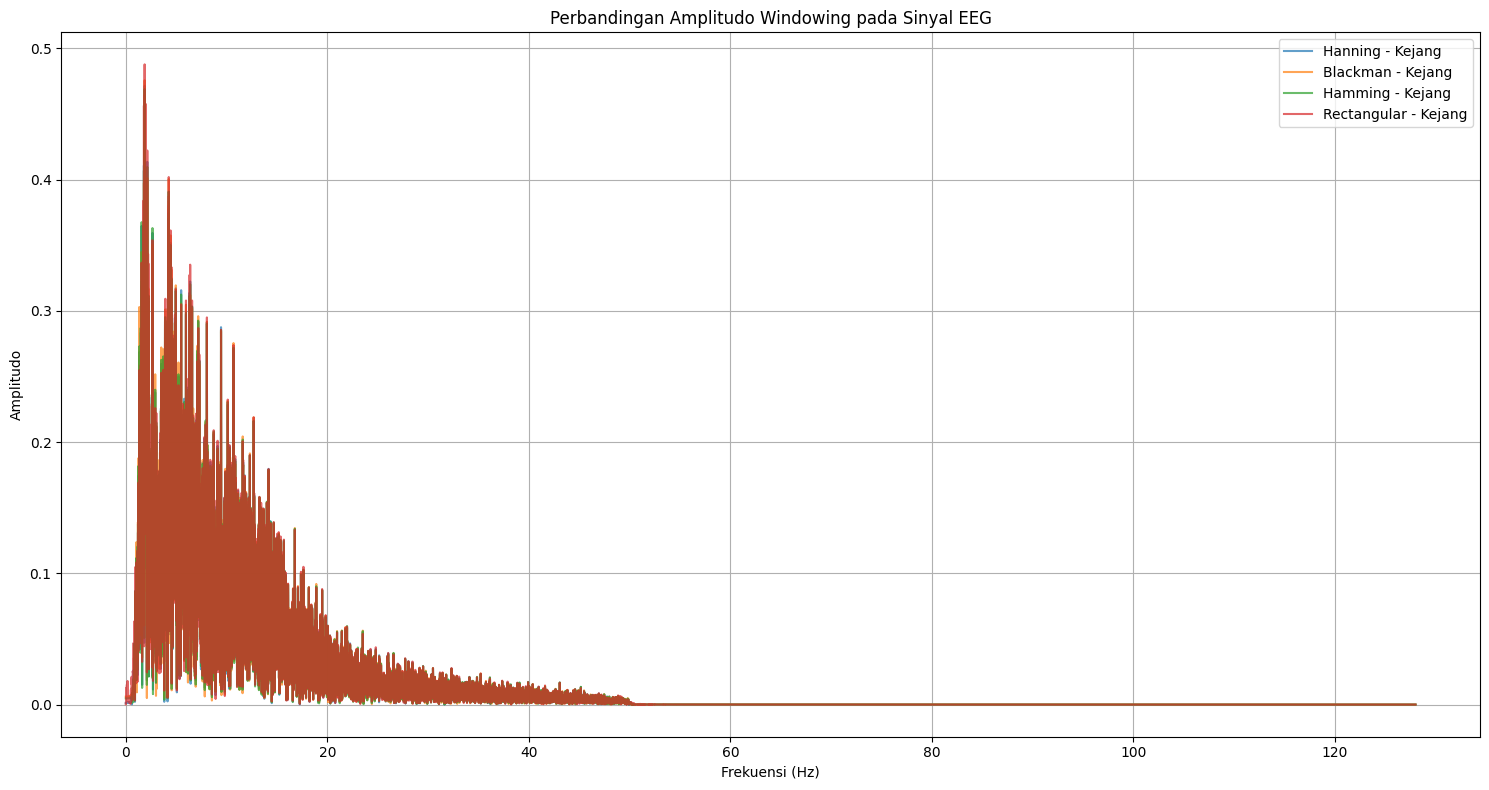

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))

# Visualisasi amplitudo untuk masing-masing window saat kejang
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HANNING'], label='Hanning - Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 BLACKMAN'], label='Blackman - Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HAMMING'], label='Hamming - Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Kejang', alpha=0.7)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Windowing pada Sinyal EEG')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

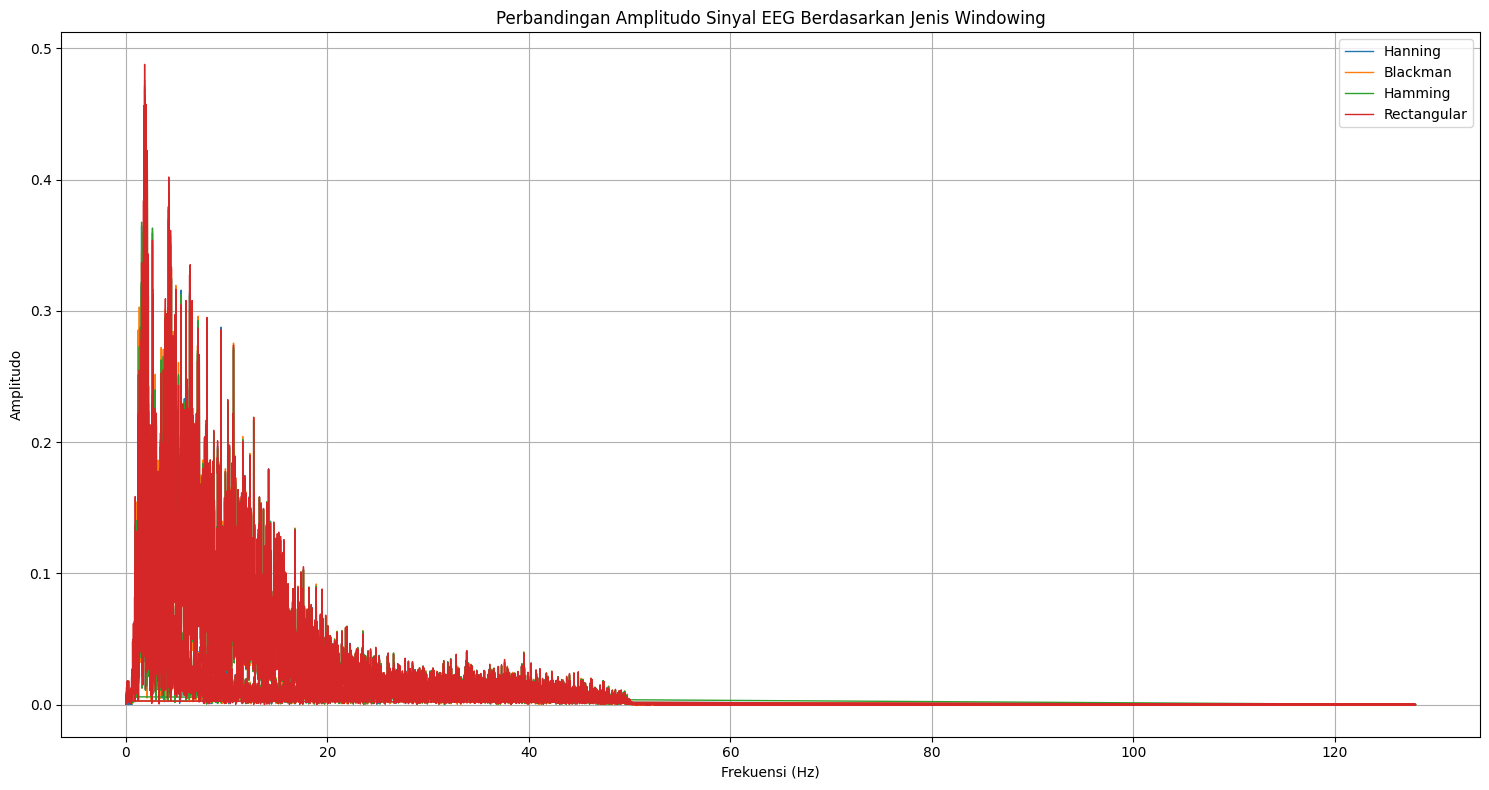

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df
# Plotting semua jenis window dalam satu grafik
plt.figure(figsize=(15, 8))

plt.plot(df['frekuensi'], df['FP1-F7 HANNING'], label='Hanning', linewidth=1)
plt.plot(df['frekuensi'], df['FP1-F7 BLACKMAN'], label='Blackman', linewidth=1)
plt.plot(df['frekuensi'], df['FP1-F7 HAMMING'], label='Hamming', linewidth=1)
plt.plot(df['frekuensi'], df['FP1-F7 RECTANGULAR'], label='Rectangular', linewidth=1)

# Konfigurasi tampilan
plt.title('Perbandingan Amplitudo Sinyal EEG Berdasarkan Jenis Windowing')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_hanning = df['FP1-F7 HANNING'].mean()
max_hanning = df['FP1-F7 HANNING'].max()
min_hanning = df['FP1-F7 HANNING'].min()
std_hanning = df['FP1-F7 HANNING'].std()

# Menampilkan hasilnya
print("Statistik FP1-F7 HANNING:")
print(f"Mean      : {mean_hanning}")
print(f"Max       : {max_hanning}")
print(f"Min       : {min_hanning}")
print(f"Std Dev   : {std_hanning}")


Statistik FP1-F7 HANNING:
Mean      : 0.011148121472518781
Max       : 0.47145688869349
Min       : 1.201898921996e-06
Std Dev   : 0.032111620207322035


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_hamming = df['FP1-F7 HAMMING'].mean()
max_hamming = df['FP1-F7 HAMMING'].max()
min_hamming = df['FP1-F7 HAMMING'].min()
std_hamming = df['FP1-F7 HAMMING'].std()

# Menampilkan hasilnya
print("Statistik FP1-F7 HAMMING:")
print(f"Mean      : {mean_hamming}")
print(f"Max       : {max_hamming}")
print(f"Min       : {min_hamming}")
print(f"Std Dev   : {std_hamming}")


Statistik FP1-F7 HAMMING:
Mean      : 0.011262074771465411
Max       : 0.46894994340431
Min       : 5.8886482333865e-05
Std Dev   : 0.0321066636632979


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_blackman = df['FP1-F7 BLACKMAN'].mean()
max_blackman = df['FP1-F7 BLACKMAN'].max()
min_blackman = df['FP1-F7 BLACKMAN'].min()
std_blackman = df['FP1-F7 BLACKMAN'].std()

# Menampilkan hasilnya
print("Statistik FP1-F7 BLACKMAN:")
print(f"Mean      : {mean_blackman}")
print(f"Max       : {max_blackman}")
print(f"Min       : {min_blackman}")
print(f"Std Dev   : {std_blackman}")


Statistik FP1-F7 BLACKMAN:
Mean      : 0.011265125027023034
Max       : 0.47567958128851
Min       : 1.6066883430336e-05
Std Dev   : 0.03217140899310533


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_rectangular = df['FP1-F7 RECTANGULAR'].mean()
max_rectangular = df['FP1-F7 RECTANGULAR'].max()
min_rectangular = df['FP1-F7 RECTANGULAR'].min()
std_rectangular = df['FP1-F7 RECTANGULAR'].std()

# Menampilkan hasilnya
print("Statistik FP1-F7 RECTANGULAR:")
print(f"Mean      : {mean_rectangular}")
print(f"Max       : {max_rectangular}")
print(f"Min       : {min_rectangular}")
print(f"Std Dev   : {std_rectangular}")


Statistik FP1-F7 RECTANGULAR:
Mean      : 0.011398122765332185
Max       : 0.48781587171056
Min       : 5.1632332266574e-06
Std Dev   : 0.0325581075707012


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')
df

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_rectangular = df['FP1-F7 RECTANGULAR'].mean()
max_rectangular = df['FP1-F7 RECTANGULAR'].max()
min_rectangular = df['FP1-F7 RECTANGULAR'].min()
std_rectangular = df['FP1-F7 RECTANGULAR'].std()

# Menampilkan hasilnya
print("Statistik FP1-F7 RECTANGULAR:")
print(f"Mean      : {mean_rectangular}")
print(f"Max       : {max_rectangular}")
print(f"Min       : {min_rectangular}")
print(f"Std Dev   : {std_rectangular}")


Statistik FP1-F7 RECTANGULAR:
Mean      : 0.011398122765332185
Max       : 0.48781587171056
Min       : 5.1632332266574e-06
Std Dev   : 0.0325581075707012


In [ ]:
hanning = pd.read_excel("/content/FFT FP1-F7 CHB05_22.xlsx")

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = hanning.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning[eeg_columns].mean()
max_values = hanning[eeg_columns].max()
min_values = hanning[eeg_columns].min()
std_values = hanning[eeg_columns].std()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values
})

# Tampilkan hasil
print(stats_hanning)

                        Mean       Max       Min       Std
FP1-F7 HANNING      0.011148  0.471457  0.000001  0.032112
FP1-F7 BLACKMAN     0.011265  0.475680  0.000016  0.032171
FP1-F7 HAMMING      0.011262  0.468950  0.000059  0.032107
FP1-F7 RECTANGULAR  0.011398  0.487816  0.000005  0.032558
FP1-F7 NO WINDOW    0.013718  0.454301  0.000025  0.032788


In [ ]:
import pandas as pd

# Membaca file Excel
df = pd.read_excel('/content/FFT FP1-F7 CHB05_22.xlsx')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7 HAMMING', 'FP1-F7 BLACKMAN', 'FP1-F7 HANNING', 'FP1-F7 RECTANGULAR', 'FP1-F7 NO WINDOW', 'frekuensi', 'seizure']
df = df[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat = df[(df['frekuensi'] % 1 == 0) & (df['frekuensi'] >= 0) & (df['frekuensi'] <= 128)]

# Menyimpan hasil filter ke file Excel baru
df_frekuensi_bulat.to_excel('/content/hasil frekuensi bulat FFT FP1-F7 CHB05_22.xlsx', index=False)

# Menampilkan hasil filter
print(df_frekuensi_bulat)


       FP1-F7 HAMMING  FP1-F7 BLACKMAN  FP1-F7 HANNING  FP1-F7 RECTANGULAR  \
0            0.004828         0.006148        0.001338            0.000320   
117          0.042285         0.047374        0.043639            0.043827   
234          0.163923         0.150299        0.165436            0.195177   
351          0.016789         0.006757        0.016549            0.029119   
468          0.155947         0.146473        0.152549            0.152102   
...               ...              ...             ...                 ...   
29736        0.000172         0.000072        0.000039            0.000207   
29856        0.000171         0.000072        0.000039            0.000207   
29976        0.000171         0.000072        0.000039            0.000206   
30096        0.000171         0.000072        0.000039            0.000207   
30216        0.000171         0.000072        0.000039            0.000206   

       FP1-F7 NO WINDOW  frekuensi       seizure  
0           

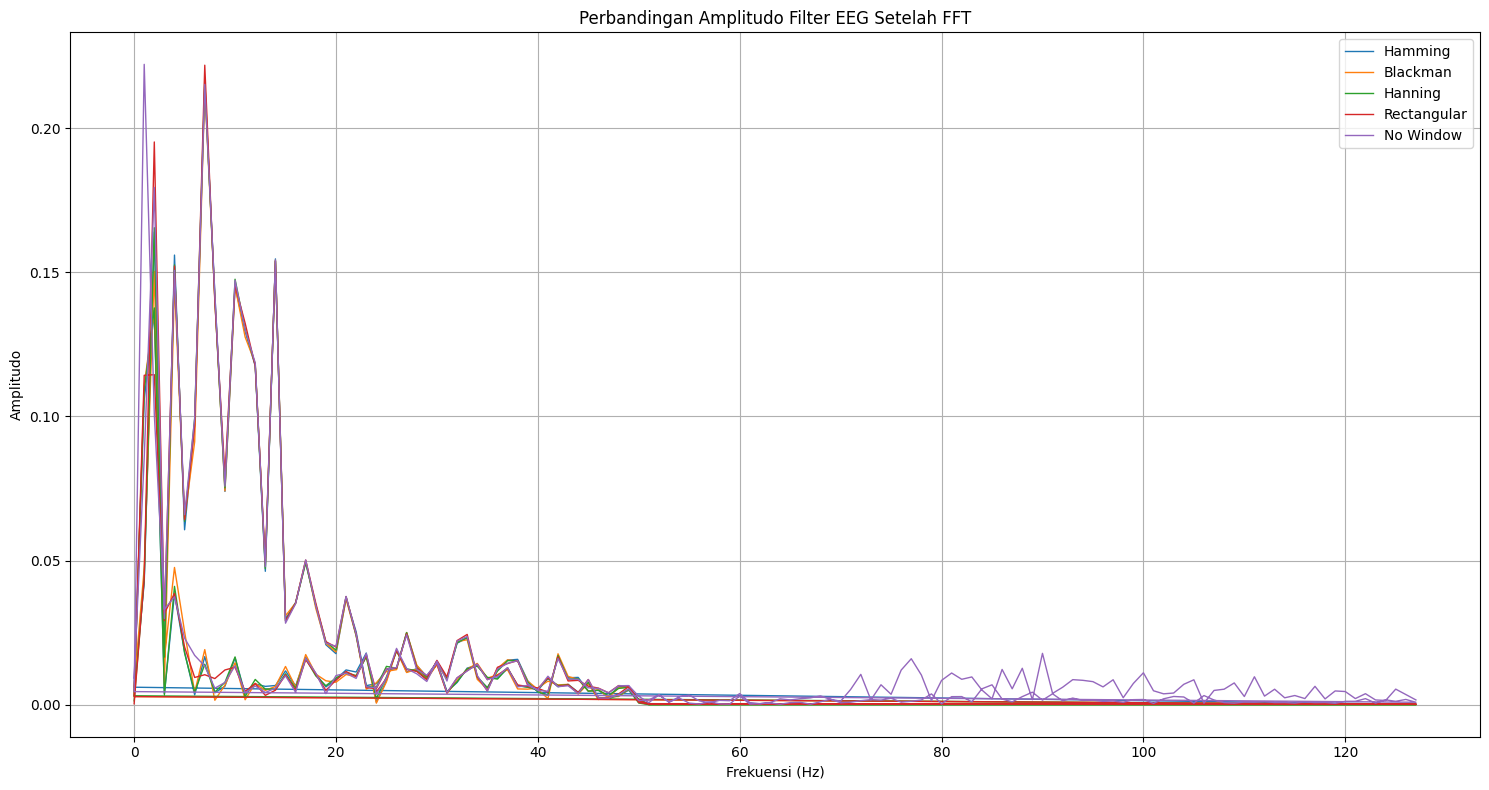

In [ ]:
import matplotlib.pyplot as plt

# Misalnya data hasil filter sudah dalam dataframe bernama df_frekuensi_bulat
plt.figure(figsize=(15, 8))

# Plot masing-masing kolom terhadap frekuensi
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 HAMMING'], label='Hamming', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 BLACKMAN'], label='Blackman', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 HANNING'], label='Hanning', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 RECTANGULAR'], label='Rectangular', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 NO WINDOW'], label='No Window', linewidth=1)

# Tambahan konfigurasi tampilan
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


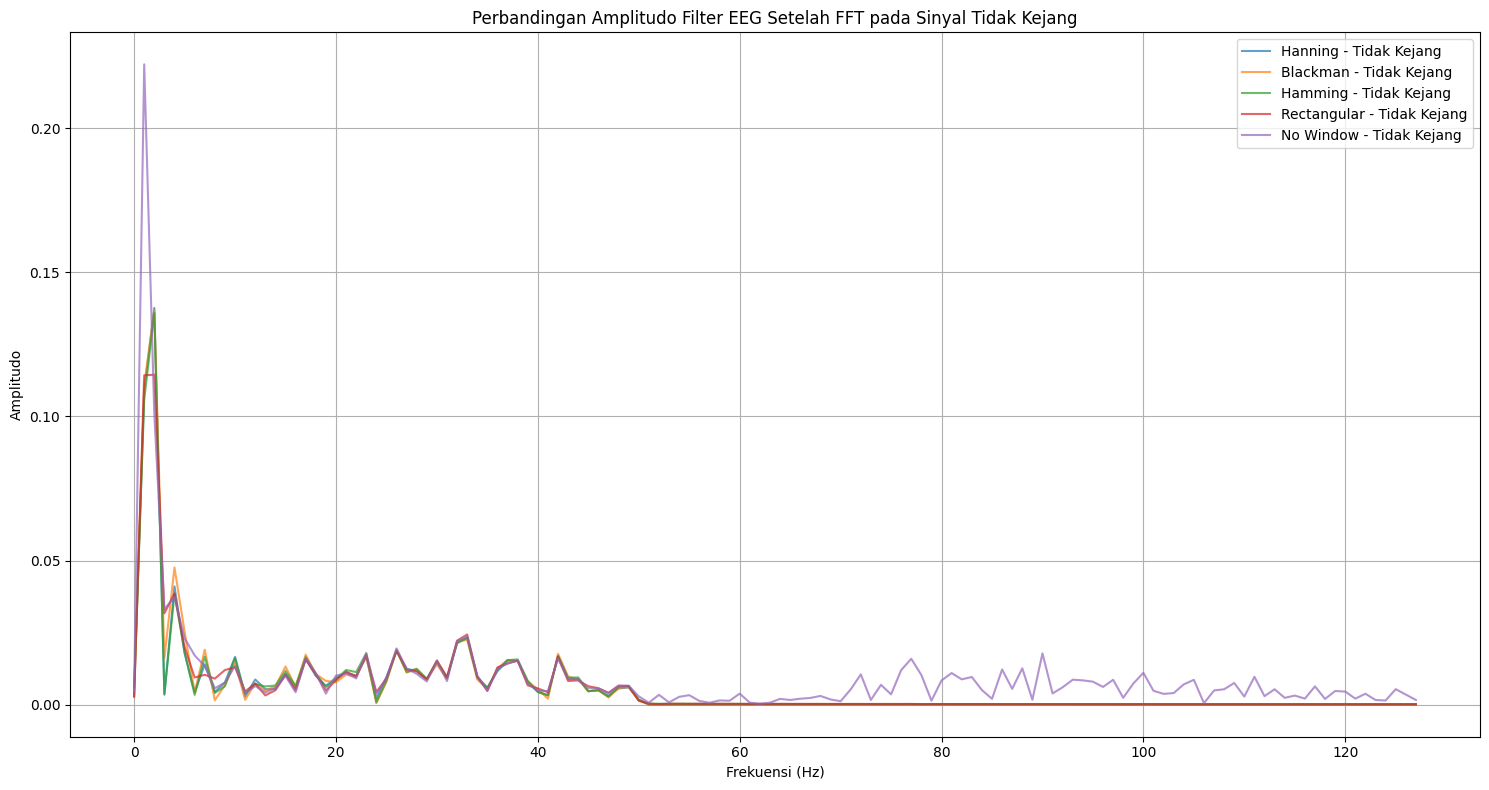

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/hasil frekuensi bulat FFT FP1-F7 CHB05_22.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))


# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HANNING'], label='Hanning - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 BLACKMAN'], label='Blackman - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HAMMING'], label='Hamming - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 NO WINDOW'], label='No Window - Tidak Kejang', alpha=0.7)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT pada Sinyal Tidak Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Baca data dari file
hanning = pd.read_excel("/content/FFT FP1-F7 CHB05_22.xlsx")

# Filter hanya baris dengan seizure == "tidak kejang"
hanning_tidak_kejang = hanning[hanning["seizure"] == "tidak kejang"]

# Pisahkan kolom numerik EEG saja (tanpa 'frekuensi' dan 'seizure')
eeg_columns = hanning_tidak_kejang.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning_tidak_kejang[eeg_columns].mean()
max_values = hanning_tidak_kejang[eeg_columns].max()
min_values = hanning_tidak_kejang[eeg_columns].min()
std_values = hanning_tidak_kejang[eeg_columns].std()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values
})

# Tampilkan hasil
print(stats_hanning)


                        Mean       Max       Min       Std
FP1-F7 HANNING      0.006153  0.279745  0.000005  0.015989
FP1-F7 BLACKMAN     0.006297  0.292445  0.000016  0.016223
FP1-F7 HAMMING      0.006267  0.287712  0.000084  0.016039
FP1-F7 RECTANGULAR  0.006371  0.298263  0.000005  0.016265
FP1-F7 NO WINDOW    0.009800  0.337393  0.000041  0.018650


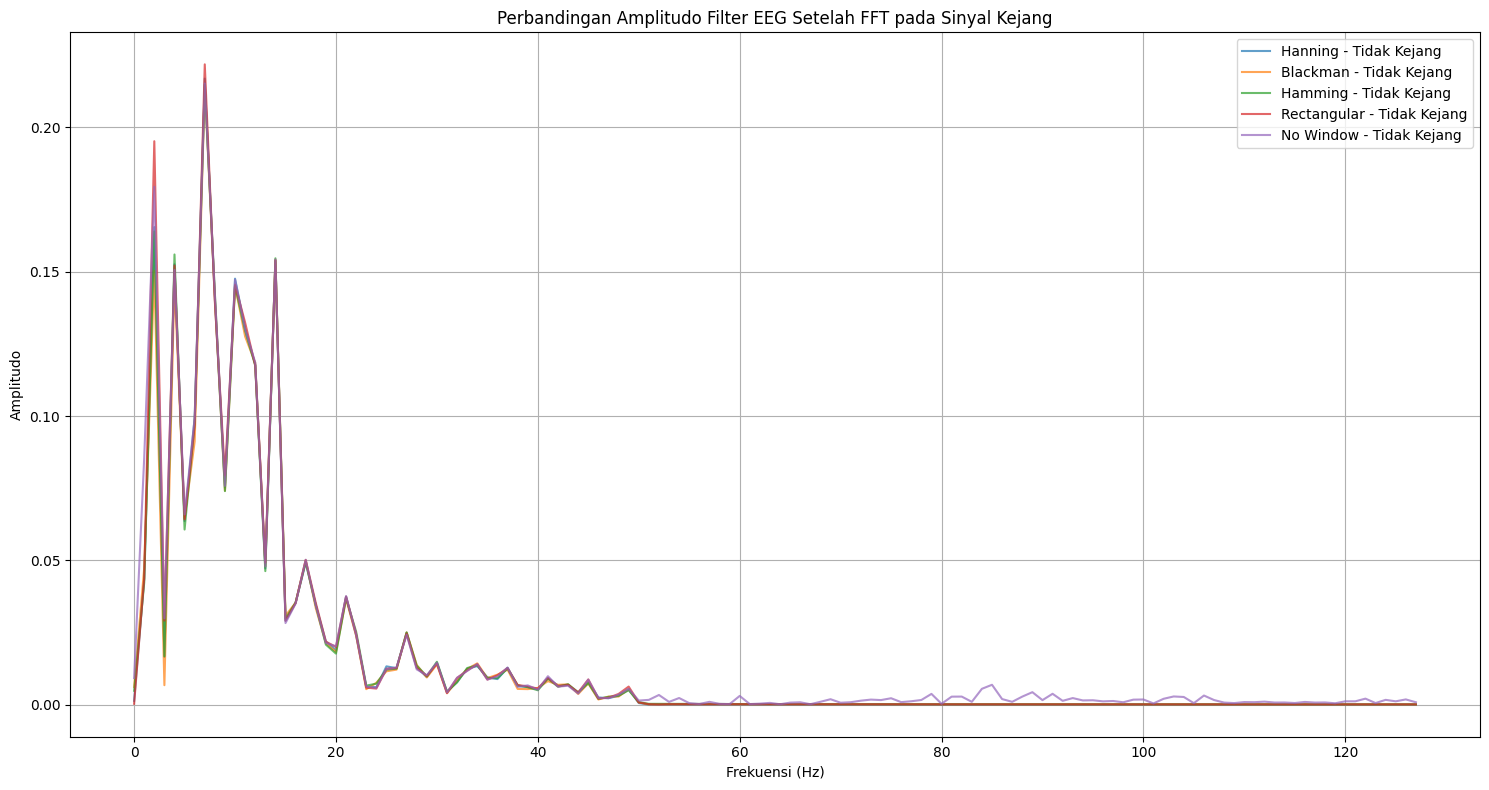

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/hasil frekuensi bulat FFT FP1-F7 CHB05_22.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))


# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HANNING'], label='Hanning - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 BLACKMAN'], label='Blackman - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HAMMING'], label='Hamming - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 NO WINDOW'], label='No Window - Tidak Kejang', alpha=0.7)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT pada Sinyal Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Baca data dari file
hanning = pd.read_excel("/content/FFT FP1-F7 CHB05_22.xlsx")

# Filter hanya baris dengan seizure == "tidak kejang"
hanning_kejang = hanning[hanning["seizure"] == "kejang"]

# Pisahkan kolom numerik EEG saja (tanpa 'frekuensi' dan 'seizure')
eeg_columns = hanning_kejang.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning_kejang[eeg_columns].mean()
max_values = hanning_kejang[eeg_columns].max()
min_values = hanning_kejang[eeg_columns].min()
std_values = hanning_kejang[eeg_columns].std()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values
})

# Tampilkan hasil
print(stats_hanning)


                        Mean       Max       Min       Std
FP1-F7 HANNING      0.016272  0.471457  0.000001  0.042128
FP1-F7 BLACKMAN     0.016360  0.475680  0.000035  0.042135
FP1-F7 HAMMING      0.016385  0.468950  0.000059  0.042101
FP1-F7 RECTANGULAR  0.016554  0.487816  0.000030  0.042702
FP1-F7 NO WINDOW    0.017736  0.454301  0.000025  0.042298


#SAMPEL TIDAK DI FILTERING (chb05_22)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

# Import data filtering
df = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")

# Memisahkan data berdasarkan label
TA1 = df[df['seizure'] == 'kejang']
TA2 = df[df['seizure'] == 'tidak kejang']

# Menampilkan jumlah data di masing-masing kategori
print("Jumlah data kejang:", len(TA1))
print("Jumlah data tidak kejang:", len(TA2))

# Menyimpan data ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/KEJANG chb05_22.csv", index=False)
TA2.to_csv("/content/drive/MyDrive/TA/NO KEJANG chb05_22.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Jumlah data kejang: 29952
Jumlah data tidak kejang: 30720


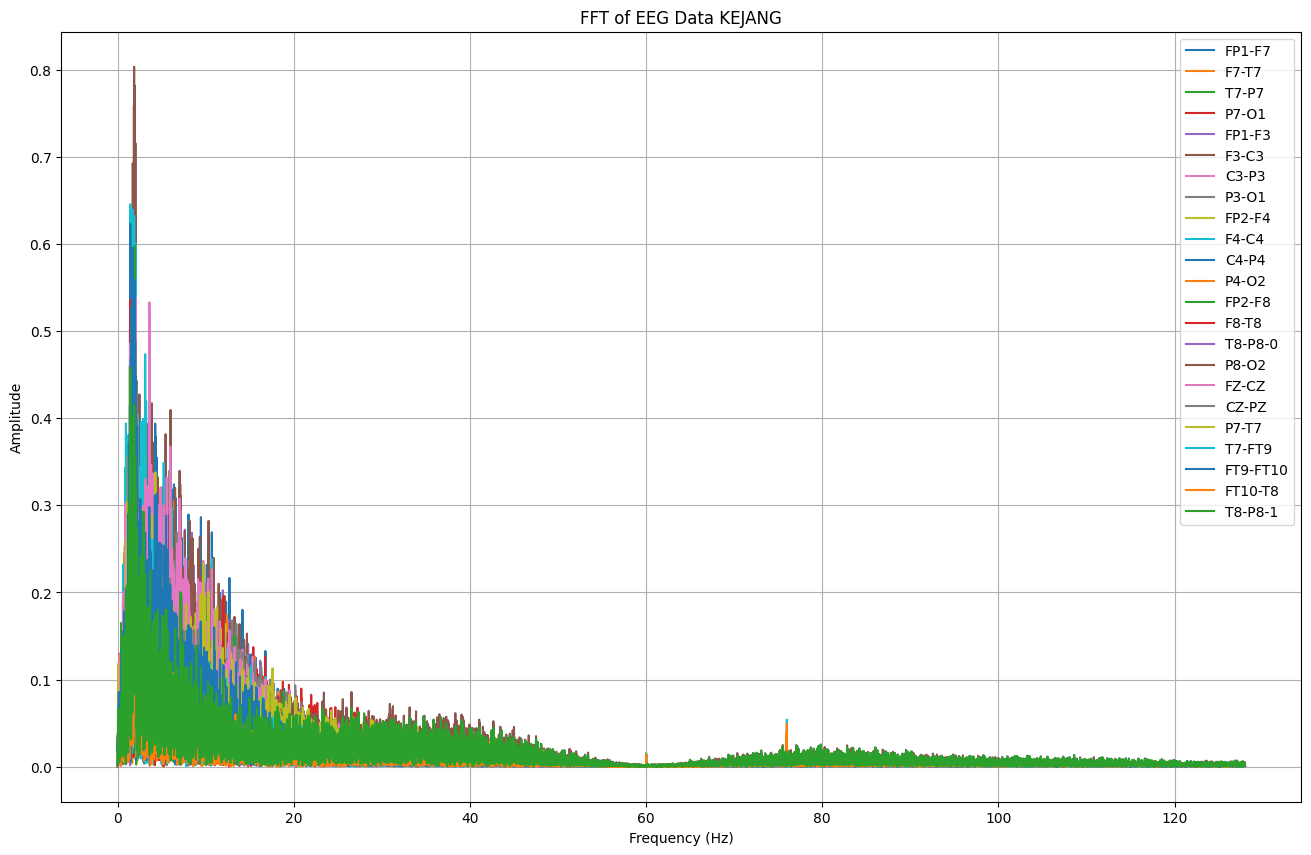

Data setelah FFT berhasil disimpan dalam file CSV:          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.009235  0.011890  0.000398  0.000517  0.003826  0.020599  0.003967   
1      0.007634  0.005260  0.009369  0.003369  0.006604  0.004260  0.003467   
2      0.004570  0.009692  0.015141  0.005317  0.015799  0.036920  0.003305   
3      0.026246  0.020555  0.013412  0.012232  0.015352  0.030290  0.009321   
4      0.050474  0.019884  0.013915  0.021452  0.026233  0.018210  0.018749   
...         ...       ...       ...       ...       ...       ...       ...   
14971  0.000215  0.001165  0.000524  0.001893  0.000546  0.000766  0.000456   
14972  0.000908  0.001310  0.001743  0.001700  0.000567  0.000878  0.000416   
14973  0.001115  0.001521  0.001220  0.001313  0.000313  0.000591  0.000632   
14974  0.000685  0.001183  0.000178  0.000645  0.000305  0.000070  0.000329   
14975  0.001664  0.002340  0.000212  0.001716  0.000548  0.000532  0.000454   



In [ ]:
TA1 = pd.read_csv("/content/drive/MyDrive/TA/KEJANG chb05_22.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data KEJANG setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/KEJANG chb05_22.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

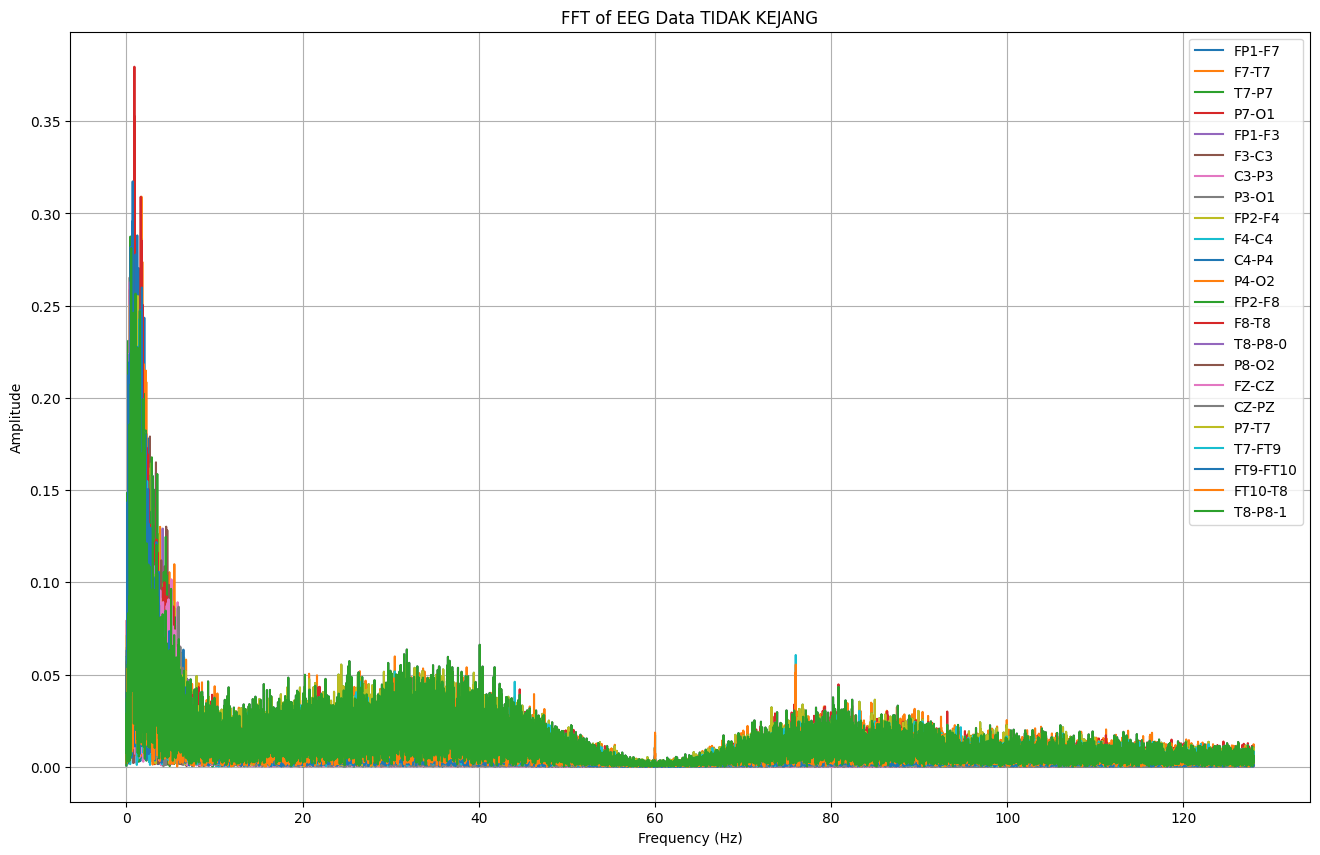

Data setelah FFT berhasil disimpan dalam file CSV:          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.004543  0.010065  0.006152  0.014404  0.042735  0.026093  0.005788   
1      0.010836  0.009414  0.006089  0.003736  0.029237  0.009308  0.002144   
2      0.008693  0.008673  0.007266  0.008608  0.031179  0.029743  0.002758   
3      0.014994  0.010506  0.013931  0.014374  0.035838  0.014097  0.006414   
4      0.014209  0.026653  0.008436  0.014803  0.021669  0.021250  0.007750   
...         ...       ...       ...       ...       ...       ...       ...   
15355  0.003287  0.006094  0.003846  0.003236  0.000463  0.001445  0.000820   
15356  0.001902  0.006798  0.007799  0.004938  0.001544  0.002781  0.000535   
15357  0.002479  0.005377  0.001046  0.001017  0.001420  0.001612  0.001600   
15358  0.004622  0.012205  0.010333  0.002657  0.000184  0.000400  0.000879   
15359  0.003280  0.009105  0.008032  0.002949  0.000793  0.001362  0.000579   



In [ ]:
TA2 = pd.read_csv("/content/drive/MyDrive/TA/NO KEJANG chb05_22.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA2.columns:
        signal = TA2[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_2 = pd.DataFrame(fft_features).T
TA_2.columns = channels
TA_2['seizure'] = TA2['seizure']
TA_2['frekuensi'] = fft_freqs

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_2.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA2[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data TIDAK KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data TIDAK KEJANG setelah FFT ke file CSV
TA_2.to_csv("/content/drive/MyDrive/TA/NO KEJANG chb05_22.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_2}")


Data berhasil digabung dan disimpan sebagai df_gabungan.csv!
Jumlah data seizure dan tidak seizure:
seizure
tidak kejang    15360
kejang          14976
Name: count, dtype: int64


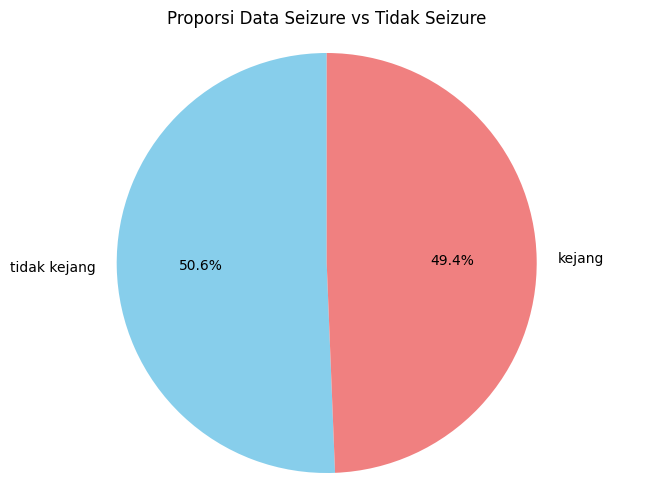

In [ ]:
# Menggabungkan data KEJANG & TIDAK KEJANG
TA_gabungan = pd.concat([TA_1, TA_2], ignore_index=True)

# Menyimpan kembali data gabungan ke file CSV
TA_gabungan.to_excel("/content/drive/MyDrive/TA/FFT chb05_22.xlsx", index=False)

print("Data berhasil digabung dan disimpan sebagai df_gabungan.csv!")

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = TA_gabungan['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

# berdasarkan jenis gelombang

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import numpy as np

Mounted at /content/drive
/content/drive/MyDrive/TA


Rata-rata Amplitudo Delta (Kejang): 1.4136
Rata-rata Amplitudo Theta (Kejang): 0.7511
Rata-rata Amplitudo Alpha (Kejang): 0.4016
Rata-rata Amplitudo Beta (Kejang): 0.2230
Rata-rata Amplitudo Gamma (Kejang): 0.1451
Rata-rata Amplitudo Delta (Normal): 0.7455
Rata-rata Amplitudo Theta (Normal): 0.3399
Rata-rata Amplitudo Alpha (Normal): 0.1687
Rata-rata Amplitudo Beta (Normal): 0.1105
Rata-rata Amplitudo Gamma (Normal): 0.0837


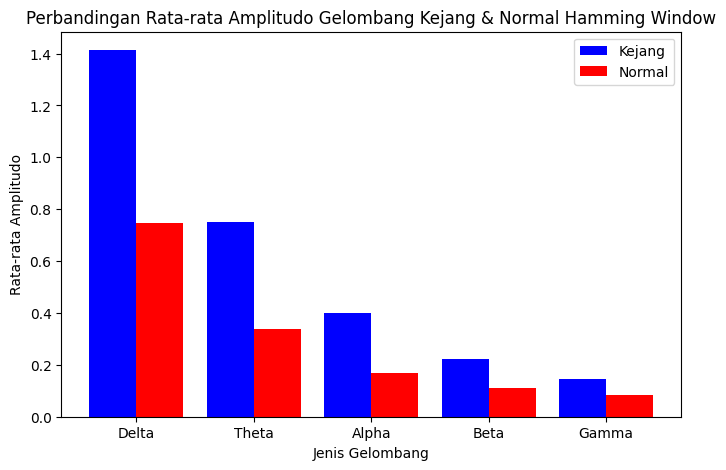

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_mean1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_mean2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Amplitudo")
plt.title("Perbandingan Rata-rata Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Rata-rata Amplitudo Delta (Kejang): 1.4090
Rata-rata Amplitudo Theta (Kejang): 0.7514
Rata-rata Amplitudo Alpha (Kejang): 0.4018
Rata-rata Amplitudo Beta (Kejang): 0.2231
Rata-rata Amplitudo Gamma (Kejang): 0.1451
Rata-rata Amplitudo Delta (Normal): 0.7382
Rata-rata Amplitudo Theta (Normal): 0.3387
Rata-rata Amplitudo Alpha (Normal): 0.1684
Rata-rata Amplitudo Beta (Normal): 0.1101
Rata-rata Amplitudo Gamma (Normal): 0.0833


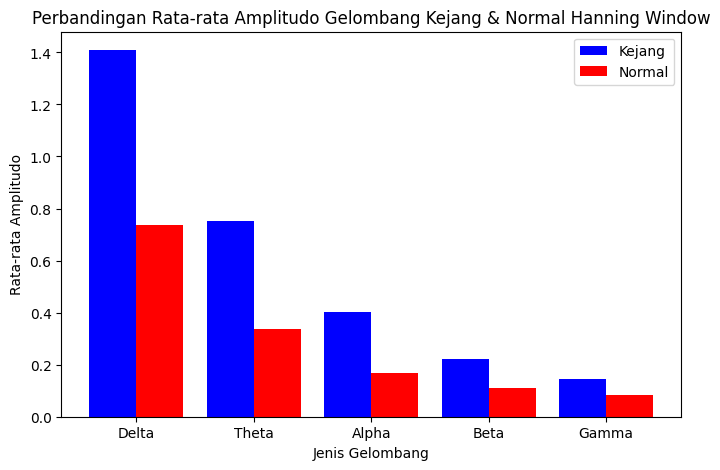

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_mean1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_mean2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Amplitudo")
plt.title("Perbandingan Rata-rata Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Rata-rata Amplitudo Delta (Kejang): 1.4220
Rata-rata Amplitudo Theta (Kejang): 0.7596
Rata-rata Amplitudo Alpha (Kejang): 0.4055
Rata-rata Amplitudo Beta (Kejang): 0.2250
Rata-rata Amplitudo Gamma (Kejang): 0.1463
Rata-rata Amplitudo Delta (Normal): 0.7352
Rata-rata Amplitudo Theta (Normal): 0.3401
Rata-rata Amplitudo Alpha (Normal): 0.1692
Rata-rata Amplitudo Beta (Normal): 0.1108
Rata-rata Amplitudo Gamma (Normal): 0.0839


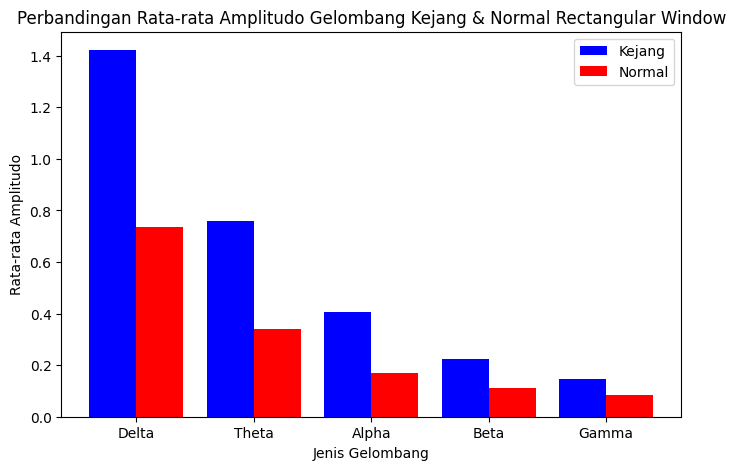

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_mean1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_mean2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Amplitudo")
plt.title("Perbandingan Rata-rata Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Rata-rata Amplitudo Delta (Kejang): 1.4165
Rata-rata Amplitudo Theta (Kejang): 0.7494
Rata-rata Amplitudo Alpha (Kejang): 0.4011
Rata-rata Amplitudo Beta (Kejang): 0.2228
Rata-rata Amplitudo Gamma (Kejang): 0.1450
Rata-rata Amplitudo Delta (Normal): 0.7564
Rata-rata Amplitudo Theta (Normal): 0.3418
Rata-rata Amplitudo Alpha (Normal): 0.1697
Rata-rata Amplitudo Beta (Normal): 0.1103
Rata-rata Amplitudo Gamma (Normal): 0.0834


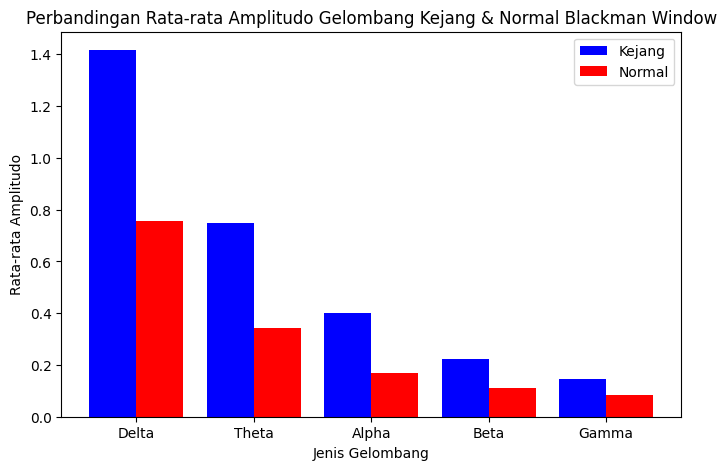

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_mean1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_mean2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Amplitudo")
plt.title("Perbandingan Rata-rata Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# maksimal gelombang kejang & tidak kejang

Nilai Maksimum Delta (Kejang): 9.5909
Nilai Maksimum Theta (Kejang): 7.1768
Nilai Maksimum Alpha (Kejang): 3.0841
Nilai Maksimum Beta (Kejang): 1.7883
Nilai Maksimum Gamma (Kejang): 1.4260
Nilai Maksimum Delta (Normal): 3.9494
Nilai Maksimum Theta (Normal): 2.3349
Nilai Maksimum Alpha (Normal): 1.2132
Nilai Maksimum Beta (Normal): 1.7213
Nilai Maksimum Gamma (Normal): 2.1740


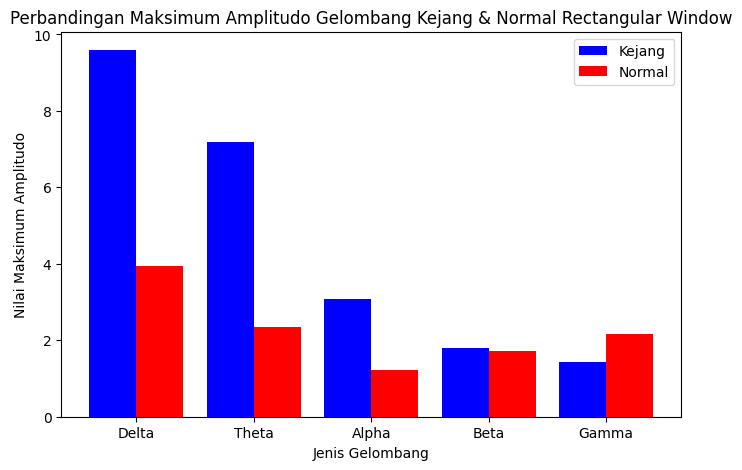

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_max1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_max2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Amplitudo")
plt.title("Perbandingan Maksimum Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Maksimum Delta (Kejang): 8.9406
Nilai Maksimum Theta (Kejang): 7.0413
Nilai Maksimum Alpha (Kejang): 3.0180
Nilai Maksimum Beta (Kejang): 1.7675
Nilai Maksimum Gamma (Kejang): 1.4037
Nilai Maksimum Delta (Normal): 4.0342
Nilai Maksimum Theta (Normal): 2.2547
Nilai Maksimum Alpha (Normal): 1.2596
Nilai Maksimum Beta (Normal): 1.7029
Nilai Maksimum Gamma (Normal): 2.0565


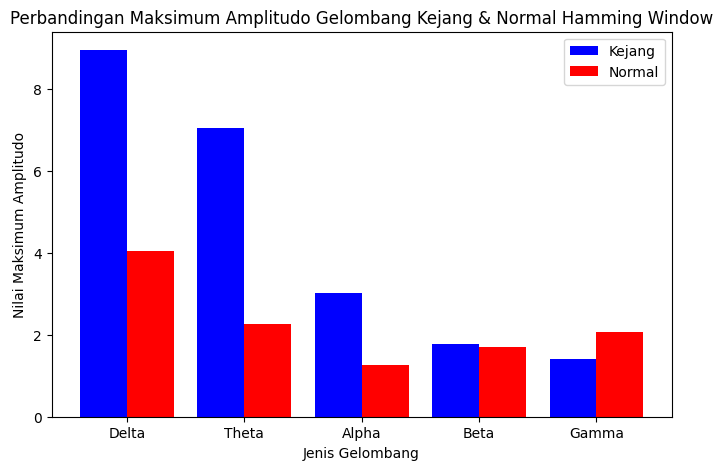

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_max1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_max2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Amplitudo")
plt.title("Perbandingan Maksimum Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Maksimum Delta (Kejang): 8.9384
Nilai Maksimum Theta (Kejang): 7.0297
Nilai Maksimum Alpha (Kejang): 3.0141
Nilai Maksimum Beta (Kejang): 1.7595
Nilai Maksimum Gamma (Kejang): 1.4042
Nilai Maksimum Delta (Normal): 3.9985
Nilai Maksimum Theta (Normal): 2.2448
Nilai Maksimum Alpha (Normal): 1.2196
Nilai Maksimum Beta (Normal): 1.7057
Nilai Maksimum Gamma (Normal): 2.0672


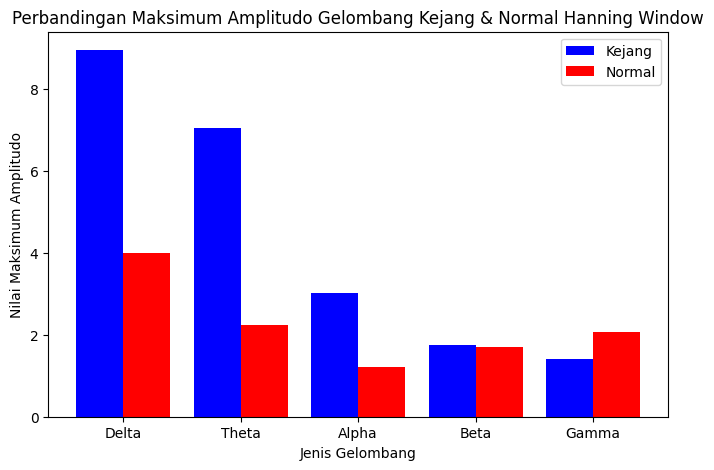

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_max1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_max2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Amplitudo")
plt.title("Perbandingan Maksimum Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Maksimum Delta (Kejang): 9.1190
Nilai Maksimum Theta (Kejang): 7.0673
Nilai Maksimum Alpha (Kejang): 3.0316
Nilai Maksimum Beta (Kejang): 1.7549
Nilai Maksimum Gamma (Kejang): 1.4044
Nilai Maksimum Delta (Normal): 3.9075
Nilai Maksimum Theta (Normal): 2.3305
Nilai Maksimum Alpha (Normal): 1.2501
Nilai Maksimum Beta (Normal): 1.6943
Nilai Maksimum Gamma (Normal): 1.9585


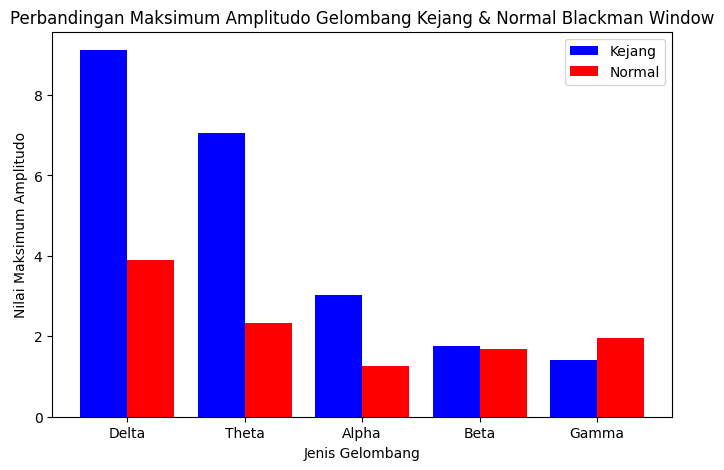

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_max1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_max2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Amplitudo")
plt.title("Perbandingan Maksimum Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# minimum gelombang kejang & tidak kejang

Nilai Minimum Delta (Kejang): 0.0313
Nilai Minimum Theta (Kejang): 0.0345
Nilai Minimum Alpha (Kejang): 0.0163
Nilai Minimum Beta (Kejang): 0.0064
Nilai Minimum Gamma (Kejang): 0.0014
Nilai Minimum Delta (Normal): 0.0650
Nilai Minimum Theta (Normal): 0.0408
Nilai Minimum Alpha (Normal): 0.0197
Nilai Minimum Beta (Normal): 0.0078
Nilai Minimum Gamma (Normal): 0.0019


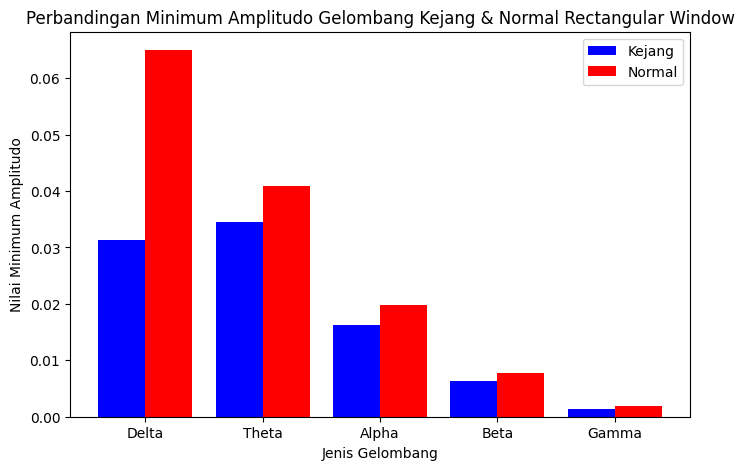

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_min1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_min2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Amplitudo")
plt.title("Perbandingan Minimum Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Minimum Delta (Kejang): 0.0401
Nilai Minimum Theta (Kejang): 0.0347
Nilai Minimum Alpha (Kejang): 0.0150
Nilai Minimum Beta (Kejang): 0.0056
Nilai Minimum Gamma (Kejang): 0.0016
Nilai Minimum Delta (Normal): 0.0637
Nilai Minimum Theta (Normal): 0.0352
Nilai Minimum Alpha (Normal): 0.0213
Nilai Minimum Beta (Normal): 0.0082
Nilai Minimum Gamma (Normal): 0.0020


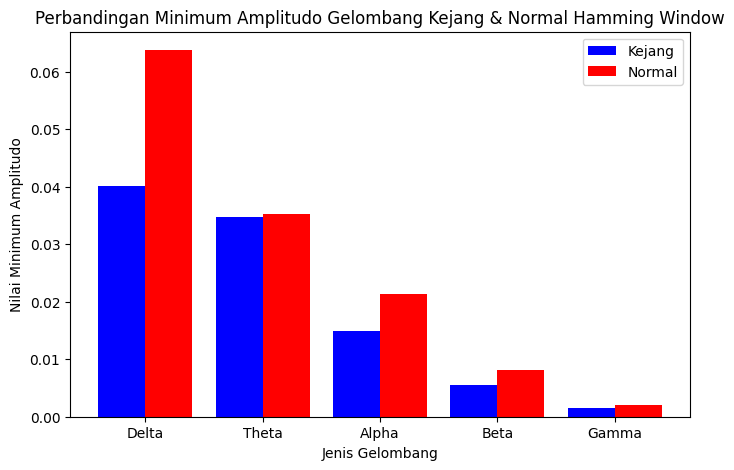

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_min1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_min2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Amplitudo")
plt.title("Perbandingan Minimum Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Minimum Delta (Kejang): 0.0383
Nilai Minimum Theta (Kejang): 0.0358
Nilai Minimum Alpha (Kejang): 0.0154
Nilai Minimum Beta (Kejang): 0.0060
Nilai Minimum Gamma (Kejang): 0.0015
Nilai Minimum Delta (Normal): 0.0624
Nilai Minimum Theta (Normal): 0.0373
Nilai Minimum Alpha (Normal): 0.0219
Nilai Minimum Beta (Normal): 0.0083
Nilai Minimum Gamma (Normal): 0.0020


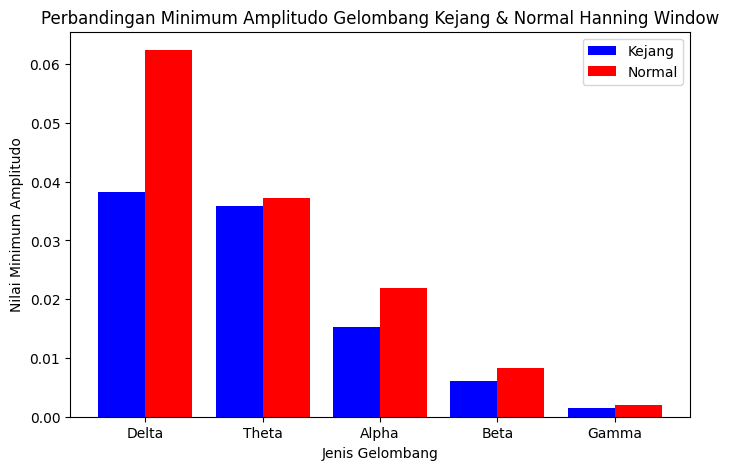

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_min1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_min2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Amplitudo")
plt.title("Perbandingan Minimum Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Nilai Minimum Delta (Kejang): 0.0349
Nilai Minimum Theta (Kejang): 0.0382
Nilai Minimum Alpha (Kejang): 0.0157
Nilai Minimum Beta (Kejang): 0.0059
Nilai Minimum Gamma (Kejang): 0.0016
Nilai Minimum Delta (Normal): 0.0599
Nilai Minimum Theta (Normal): 0.0391
Nilai Minimum Alpha (Normal): 0.0205
Nilai Minimum Beta (Normal): 0.0083
Nilai Minimum Gamma (Normal): 0.0020


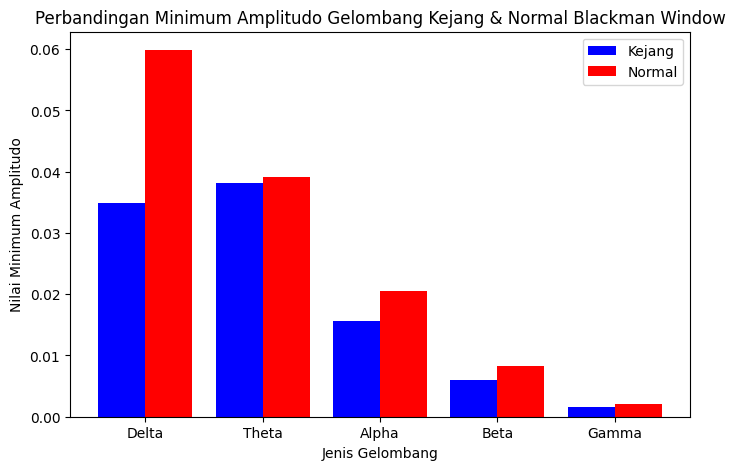

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_min1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_min2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Amplitudo")
plt.title("Perbandingan Minimum Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# total gelombang kejang dan tidak kejang

Total Amplitudo Delta (Kejang): 46756.9255
Total Amplitudo Theta (Kejang): 33302.9051
Total Amplitudo Alpha (Kejang): 22219.3812
Total Amplitudo Beta (Kejang): 41914.2780
Total Amplitudo Gamma (Kejang): 32075.7989
Total Amplitudo Delta (Normal): 46811.0821
Total Amplitudo Theta (Normal): 28872.2597
Total Amplitudo Alpha (Normal): 17950.2231
Total Amplitudo Beta (Normal): 39989.8393
Total Amplitudo Gamma (Normal): 35614.1894


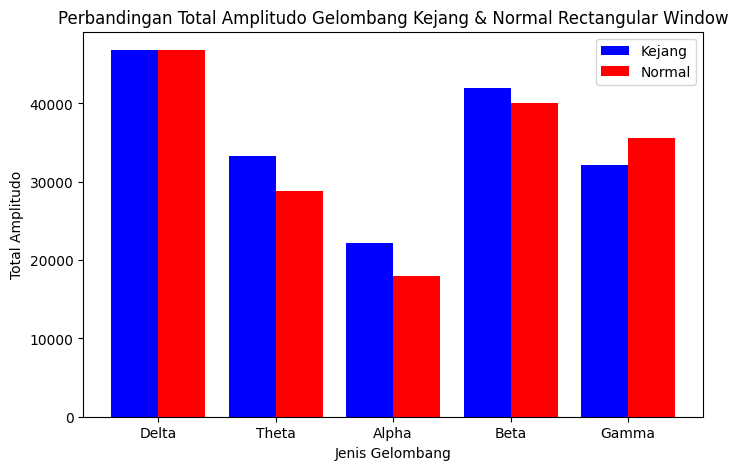

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 46478.3722
Total Amplitudo Theta (Kejang): 32932.1249
Total Amplitudo Alpha (Kejang): 22009.1258
Total Amplitudo Beta (Kejang): 41550.3747
Total Amplitudo Gamma (Kejang): 31797.5968
Total Amplitudo Delta (Normal): 47196.3831
Total Amplitudo Theta (Normal): 28692.5871
Total Amplitudo Alpha (Normal): 17799.1386
Total Amplitudo Beta (Normal): 39627.1919
Total Amplitudo Gamma (Normal): 35348.1849


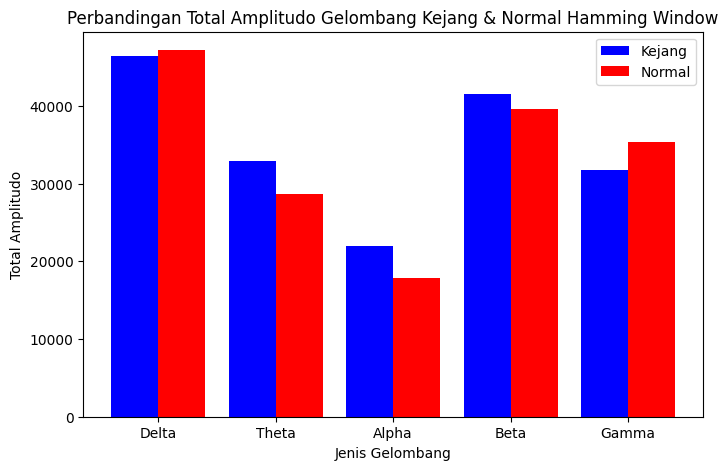

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 46327.1299
Total Amplitudo Theta (Kejang): 32943.6055
Total Amplitudo Alpha (Kejang): 22016.2212
Total Amplitudo Beta (Kejang): 41563.5842
Total Amplitudo Gamma (Kejang): 31799.8039
Total Amplitudo Delta (Normal): 46999.5472
Total Amplitudo Theta (Normal): 28755.2245
Total Amplitudo Alpha (Normal): 17869.4985
Total Amplitudo Beta (Normal): 39719.8940
Total Amplitudo Gamma (Normal): 35376.3498


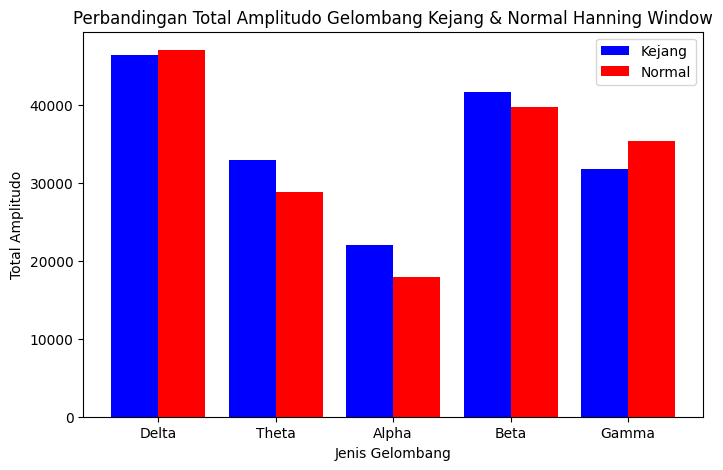

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 46574.1928
Total Amplitudo Theta (Kejang): 32854.3364
Total Amplitudo Alpha (Kejang): 21979.5977
Total Amplitudo Beta (Kejang): 41512.3887
Total Amplitudo Gamma (Kejang): 31783.4337
Total Amplitudo Delta (Normal): 48161.6596
Total Amplitudo Theta (Normal): 29017.6057
Total Amplitudo Alpha (Normal): 18004.3268
Total Amplitudo Beta (Normal): 39781.0547
Total Amplitudo Gamma (Normal): 35398.3997


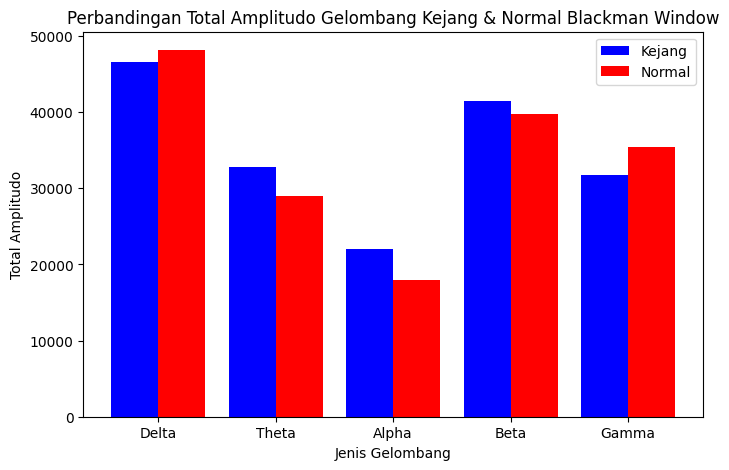

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# energi gelombang kejang dan tidak kejang

Energi Delta (Kejang): 128243.1690
Energi Theta (Kejang): 53889.6269
Energi Alpha (Kejang): 19476.5916
Energi Beta (Kejang): 19430.3796
Energi Gamma (Kejang): 10068.9752
Energi Delta (Normal): 45837.3282
Energi Theta (Normal): 13792.7711
Energi Alpha (Normal): 4057.7790
Energi Beta (Normal): 6356.2579
Energi Gamma (Normal): 5454.3356


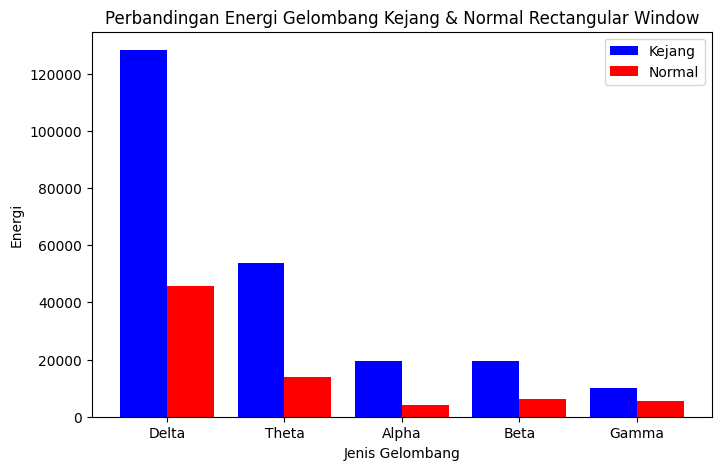

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_energies1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_energies2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi")
plt.title("Perbandingan Energi Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Energi Delta (Kejang): 125880.5827
Energi Theta (Kejang): 52618.6813
Energi Alpha (Kejang): 19101.1555
Energi Beta (Kejang): 19103.2670
Energi Gamma (Kejang): 9900.7934
Energi Delta (Normal): 46558.4306
Energi Theta (Normal): 13582.4304
Energi Alpha (Normal): 4001.6867
Energi Beta (Normal): 6262.4422
Energi Gamma (Normal): 5369.1941


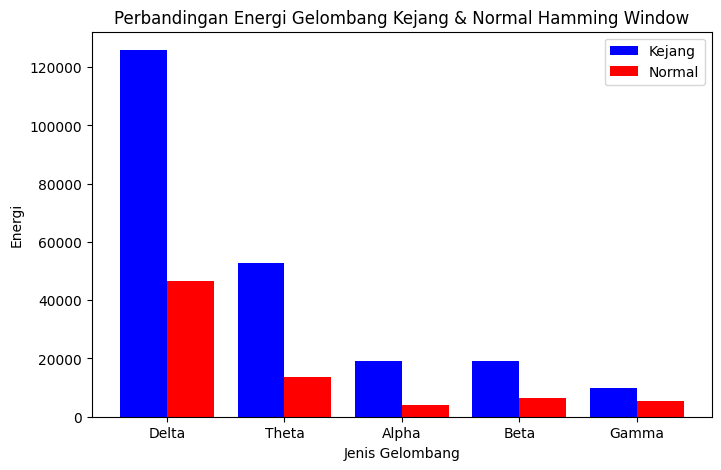

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_energies1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_energies2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi")
plt.title("Perbandingan Energi Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Energi Delta (Kejang): 125194.4523
Energi Theta (Kejang): 52645.3801
Energi Alpha (Kejang): 19112.1667
Energi Beta (Kejang): 19114.5872
Energi Gamma (Kejang): 9903.9810
Energi Delta (Normal): 46000.2920
Energi Theta (Normal): 13590.6354
Energi Alpha (Normal): 4010.6104
Energi Beta (Normal): 6269.6886
Energi Gamma (Normal): 5371.7034


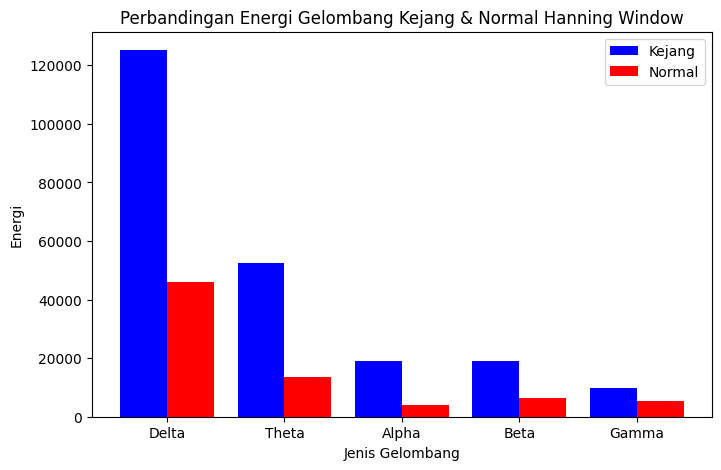

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_energies1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_energies2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi")
plt.title("Perbandingan Energi Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Energi Delta (Kejang): 126475.6016
Energi Theta (Kejang): 52485.1711
Energi Alpha (Kejang): 19065.6132
Energi Beta (Kejang): 19080.9210
Energi Gamma (Kejang): 9896.5161
Energi Delta (Normal): 48382.4191
Energi Theta (Normal): 13787.3061
Energi Alpha (Normal): 4058.8521
Energi Beta (Normal): 6271.1752
Energi Gamma (Normal): 5348.8202


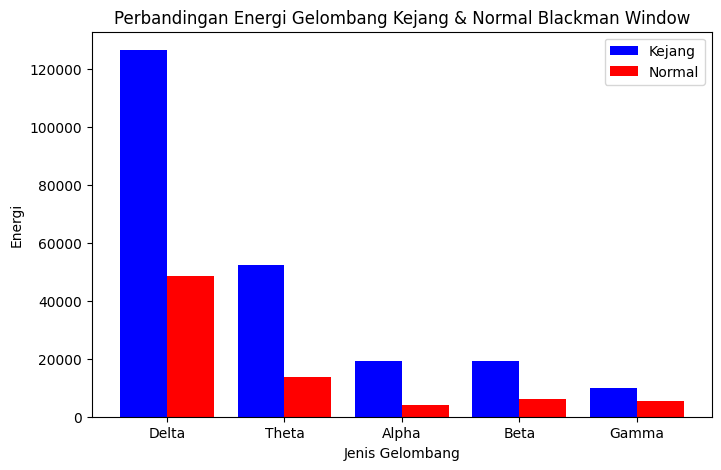

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_energies1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_energies2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi")
plt.title("Perbandingan Energi Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# stdv gelombang kejang dan tidak kejang

Standar Deviasi Delta (Kejang): 1.3704
Standar Deviasi Theta (Kejang): 0.8076
Standar Deviasi Alpha (Kejang): 0.4370
Standar Deviasi Beta (Kejang): 0.2317
Standar Deviasi Gamma (Kejang): 0.1566
Standar Deviasi Delta (Normal): 0.4235
Standar Deviasi Theta (Normal): 0.2163
Standar Deviasi Alpha (Normal): 0.0981
Standar Deviasi Beta (Normal): 0.0730
Standar Deviasi Gamma (Normal): 0.0762


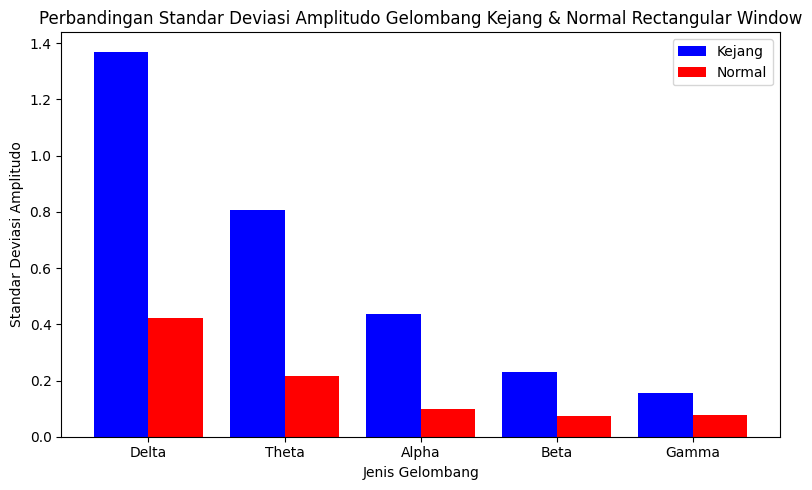

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_std1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_std2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Amplitudo")
plt.title("Perbandingan Standar Deviasi Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


Standar Deviasi Delta (Kejang): 1.3529
Standar Deviasi Theta (Kejang): 0.7975
Standar Deviasi Alpha (Kejang): 0.4327
Standar Deviasi Beta (Kejang): 0.2298
Standar Deviasi Gamma (Kejang): 0.1553
Standar Deviasi Delta (Normal): 0.4239
Standar Deviasi Theta (Normal): 0.2130
Standar Deviasi Alpha (Normal): 0.0973
Standar Deviasi Beta (Normal): 0.0725
Standar Deviasi Gamma (Normal): 0.0755


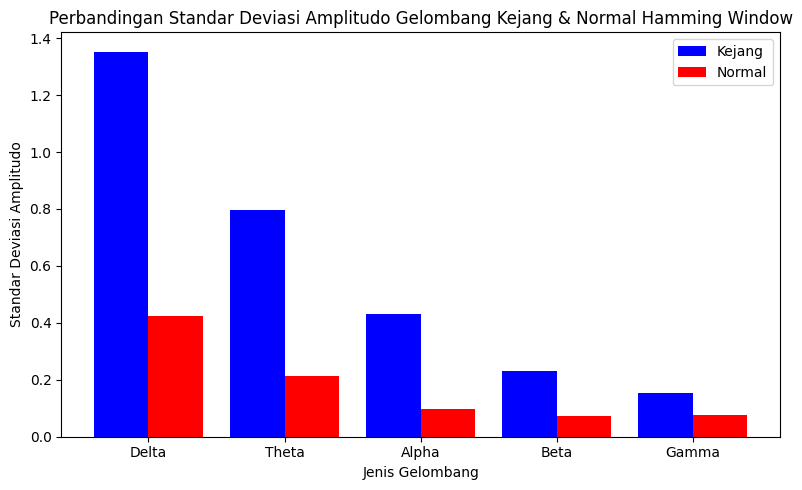

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/HAMMING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_std1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_std2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Amplitudo")
plt.title("Perbandingan Standar Deviasi Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


Standar Deviasi Delta (Kejang): 1.3500
Standar Deviasi Theta (Kejang): 0.7976
Standar Deviasi Alpha (Kejang): 0.4328
Standar Deviasi Beta (Kejang): 0.2298
Standar Deviasi Gamma (Kejang): 0.1554
Standar Deviasi Delta (Normal): 0.4214
Standar Deviasi Theta (Normal): 0.2130
Standar Deviasi Alpha (Normal): 0.0972
Standar Deviasi Beta (Normal): 0.0725
Standar Deviasi Gamma (Normal): 0.0756


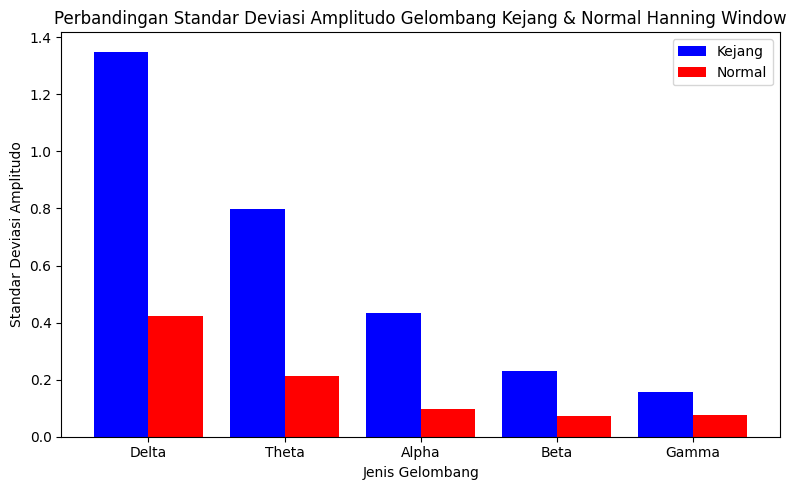

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/HANNING FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_std1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_std2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Amplitudo")
plt.title("Perbandingan Standar Deviasi Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


Standar Deviasi Delta (Kejang): 1.3565
Standar Deviasi Theta (Kejang): 0.7972
Standar Deviasi Alpha (Kejang): 0.4325
Standar Deviasi Beta (Kejang): 0.2297
Standar Deviasi Gamma (Kejang): 0.1553
Standar Deviasi Delta (Normal): 0.4333
Standar Deviasi Theta (Normal): 0.2135
Standar Deviasi Alpha (Normal): 0.0973
Standar Deviasi Beta (Normal): 0.0723
Standar Deviasi Gamma (Normal): 0.0751


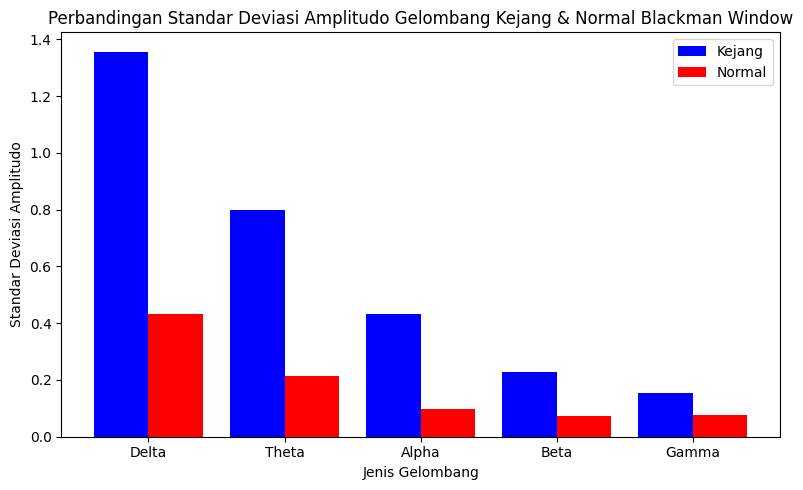

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_std1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_std2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Amplitudo")
plt.title("Perbandingan Standar Deviasi Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()
